# Importing libraries

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
# display all columns of the dataframe
pd.options.display.max_columns = None

In [2]:
#setting the plot size using rcParams
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
#importing datasets for training and testing the models
df=pd.read_csv("../input/mental-health-in-tech-survey/survey.csv")

#rwading the first 5 records from the training data set
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Understanding the data set

In [4]:
#checking the number of rows and columns in the training data set
df.shape

(1259, 27)

In [5]:
# 'dtypes' gives the data type for each column
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

From the above output we can see that all the features are of object data type, except serial number and age.
But timestamp is wrongly attributed as object which should be datetime datatype.We will convert the datatype of timestamp. 

In [6]:
#Splitting the timestamp feature as it includes both date and time
df[['Date','Time']]=df['Timestamp'].str.split(" ",n=1,expand=True)

In [7]:
#dropping the timestamp column as we have already created two columns which have date and time
#axis=1 deletes the entire column
df.drop('Timestamp',axis=1,inplace=True)

In [8]:
#converting the datatype of date and time columns
df['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S')
df['Date']=pd.to_datetime(df['Date'])

In [9]:
#finally checking the columns and their datatypes after alteration
df.dtypes

Age                                   int64
Gender                               object
Country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview              object
phys_health_interview           

Now all the features are having correct datatypes

In [10]:
# the describe() returns the statistical summary of the numeric variables
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


The summary contains information about the count,mean,highest,lowest values of the columns and their 1st,2nd and 3rd quartiles values as well.From the above output we can see that both the columns doesnot have any missing values as the count of both the variables is equal to the number of rows.But in age we see some discrepency.The maximum age is 99999999999 and the minimum is -1726.We need to handle these data. 

In [11]:
#it gives the statistical summary of all the categorical variables
df.describe(include=object)

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5


From the above output we can see that the state,self-employed,work_interfere and the comments columns have missing data as the count is less than 1048.We will handle these columns.
We see that in gender column there are 45 unique values.We need to see this column for any redundancy or error.
The country column has 45 unique values and the data has been maximum taken from United States and the frequency is 644 out of 1048.

# DATA PREPARATION

In [12]:
#finding the unique values in the column gender
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

We see that there are lots of misspelled words and synonymns have been used.This is the reason there are 45 unique values.We will convert them into 3 parts male(M),female(F) and transgender(T). 

In [13]:
error={'Female':'F',
      'Male':'M',
      'male':'M',
      'female':'F',
      'm':'M',
      'Male-ish':'M',
      'maile':'M',
      'Trans-female':'T',
      'Cis Female':'F',
      'something kinda male?':'M',
      'Cis Male':'M',
      'Woman':'F',
      'f':'F',
      'Mal':'M',
       'Male (CIS)':'M',
      'queer/she/they':'F',
      'non-binary':'T',
      'Enby':'T',
      'Femake':'F',
      'woman':'F',
      'Make':'M',
      'fluid':'T',
      'Malr':'M',
      'cis male':'M',
      'Female (cis)':'F',
      'Guy (-ish) ^_^':'M',
      'queer':'T',
      'Female (trans)':'T',
      'male leaning androgynous':'T',
       'Neuter':'T',
       'cis-female/femme':'F',
       'msle':'M',
       'Agender':'T',
       'Genderqueer':'T',
       'Female':'F',
       'Androgyne':'T',
       'Nah':'T', 
       'All':'T',
      'Female ':'F',
       'Male ':'M', 
       'Man':'M', 
       'Trans woman':'T', 
       'Mail':'M',
       'A little about you':'T'}
df['Gender']=df['Gender'].map(error).fillna(df['Gender'])

In [14]:
df['Gender'].unique()

array(['F', 'M', 'T', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

After applying the map function to the column gender and mapping the misspelled words and synonymns into 'M','F' and 'T' we see that there are only 3 unique values.

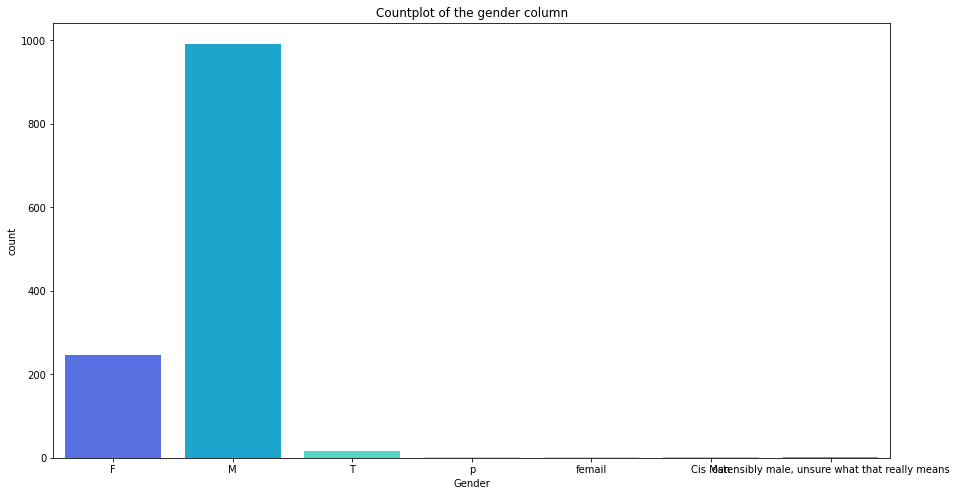

In [15]:
#plotting the countplot for the gender column
sns.countplot(df['Gender'],palette='rainbow')
plt.title("Countplot of the gender column")
plt.show()

In [16]:
#Checking the number of male,female and transgender in the gender column
df['Gender'].value_counts()

M                                                 992
F                                                 247
T                                                  16
femail                                              1
Cis Man                                             1
ostensibly male, unsure what that really means      1
p                                                   1
Name: Gender, dtype: int64

From the plot and the function .valuecounts() it can be clearly seen that the number of males in the data set are 829,females are 203 and transgender are 16.

In [17]:
#finding the unique values of age column
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [18]:
#removing the redundant values from the age column
df=df[df['Age']!=99999999999]
df=df[df['Age']!=-29]
df=df[df['Age']!=329]
df=df[df['Age']!=-1726]
df=df[df['Age']!=5]
df=df[df['Age']!=8]

# Label encoding of the treatment column

In [19]:
# replace 'no' with zero
df['treatment'] = df['treatment'].replace('No', 0)
# replace 'yes' with one
df['treatment'] = df['treatment'].replace('Yes', 1)

#displaying the first 5 records to check the treatment column after label enconding
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date,Time
0,37,F,United States,IL,NaN,No,1,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,2014-08-27,1900-01-01 11:29:31
1,44,M,United States,IN,NaN,No,0,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,2014-08-27,1900-01-01 11:29:37
2,32,M,Canada,NaN,NaN,No,0,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,2014-08-27,1900-01-01 11:29:44
3,31,M,United Kingdom,NaN,NaN,Yes,1,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,2014-08-27,1900-01-01 11:29:46
4,31,M,United States,TX,NaN,No,0,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,2014-08-27,1900-01-01 11:30:22


1    633
0    620
Name: treatment, dtype: int64

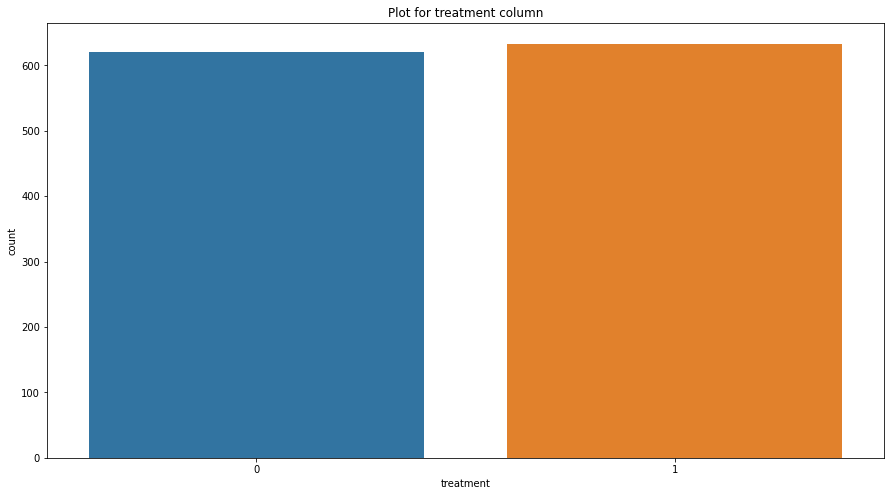

In [20]:
#plotting the countplot for treatment column
sns.countplot(df['treatment'])
plt.title("Plot for treatment column")

#checking the count of each class
df['treatment'].value_counts()

From the above output we see that the data is mostly balanced

# Exploratory Data Analysis


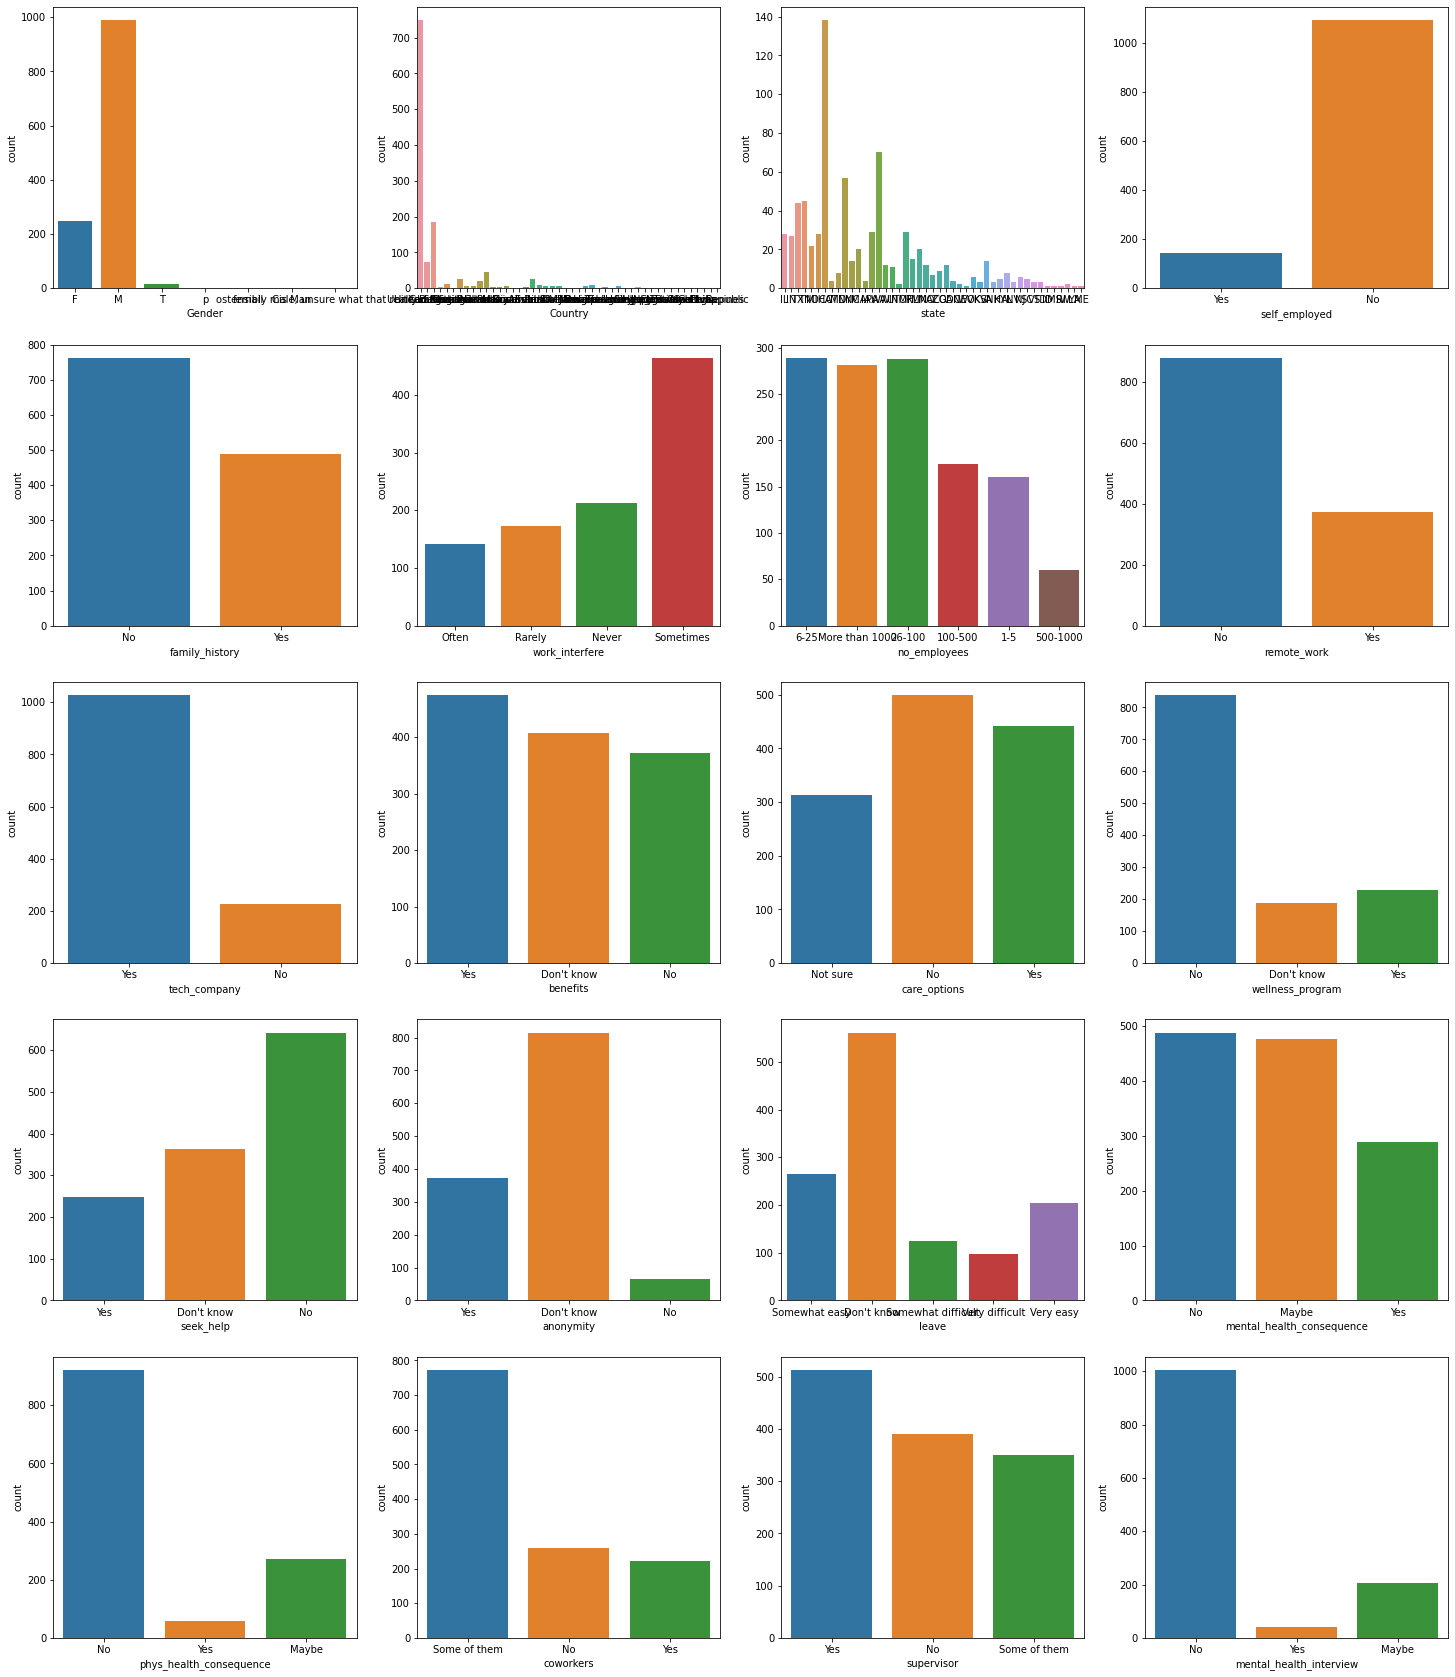

In [21]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]
z=['Country','state']
# use for loop to check the data type of each variable
for column in df:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df[column]):
        if column!=z:
        
        # append the variables with 'categoric' data type in the list 'categorical'
             categorical.append(column)


# plot the count plot for each categorical variable 
fig, ax = plt.subplots(nrows = 5, ncols = 4, figsize=(25, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    sns.countplot(df[variable], ax = subplot)

# display the plot
plt.show()

From the plots we can see that mainly maximum variables have 3 values except for family_history,self_employed,country,state,remote_work,work_interfere and number of employees.

Deductions:

1)Number of male employees are greater than the female and transgender employees in the dataset.

2)Few number of employees in the data set are self-employed.

3)Maximum employees doesnot have any family history of mental illness.

4)Maximum employees feel that their mental condition sometimes interfere with their work.

5)Maximum employees whose data has been provided does not work from remote 50% of the time.

6)Maximum employees who have mental condition works in tech company.

7)Employees who doesnot know about mental health care that their employer provides or whose employer has not discussed mental  
health as part of an employee wellness program have mental health issue.

8)Many employees are willing to share their mental health issue with their supervisor.

9)Few employees are willing to share their mental health issue with their coworkers.

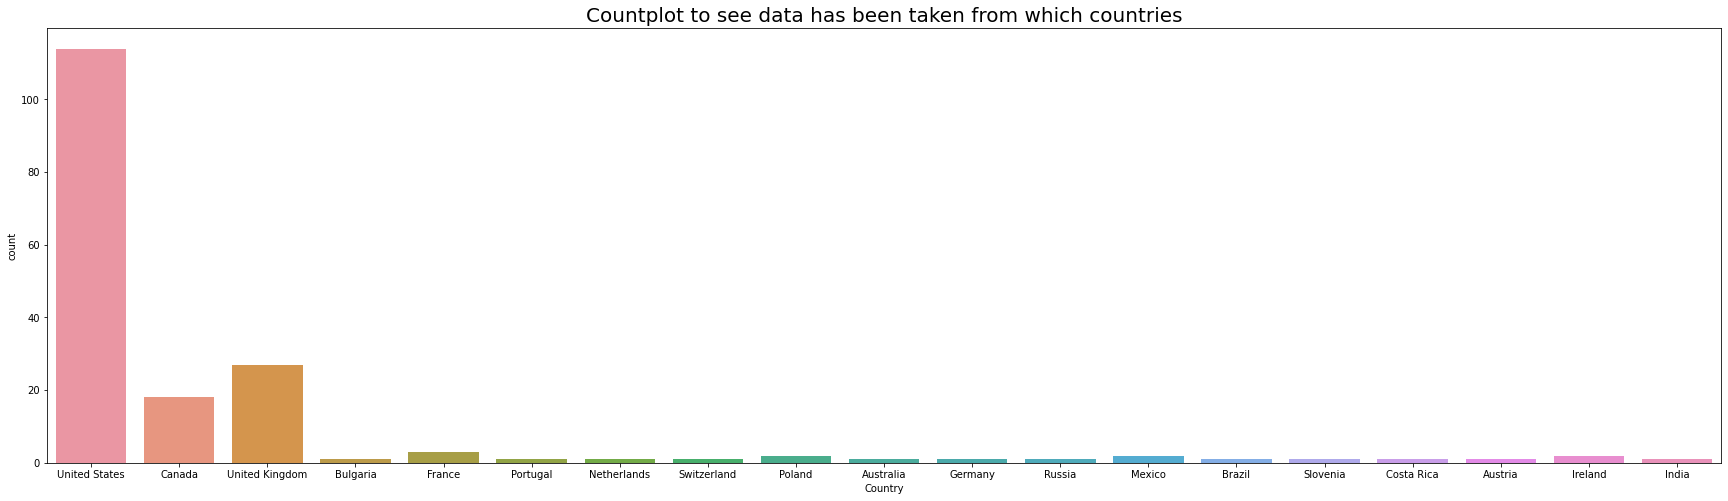

In [22]:
# plotting the counterplot for the country column 
#to see 
plt.figure(figsize=(30,8))
sns.countplot(df['Country'][:180])
plt.title("Countplot to see data has been taken from which countries",fontsize=20)
plt.show()

From the plot we can see that the maximum data has been taken from United States followed by United Kingdom

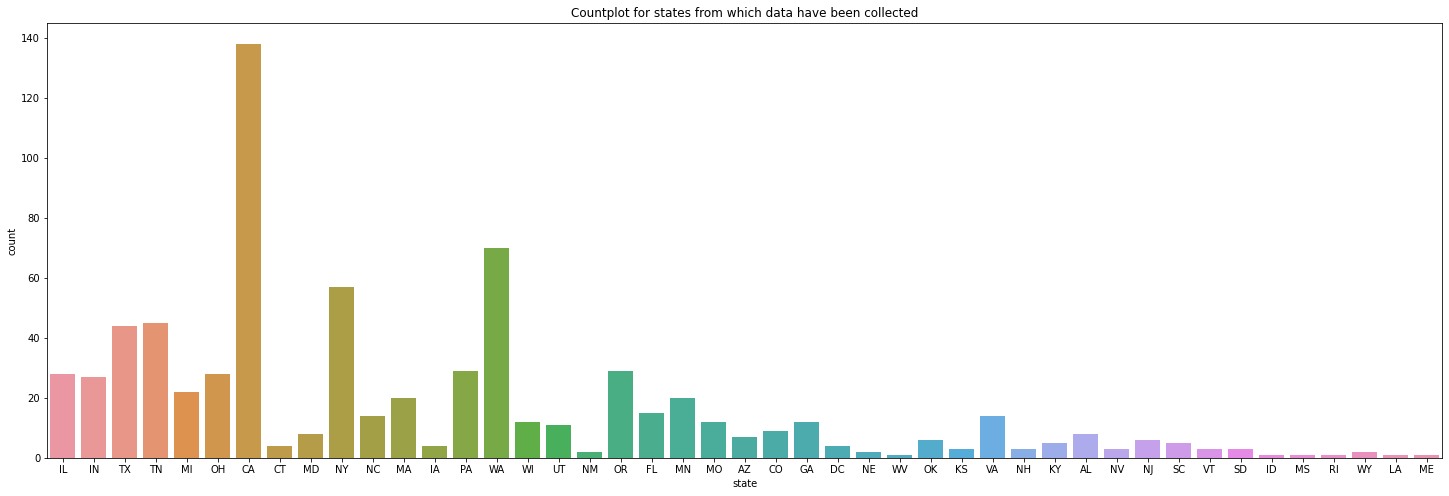

In [23]:
plt.figure(figsize=(25,8))
sns.countplot(df['state'])
plt.title("Countplot for states from which data have been collected")
plt.show()

From the plot we can see that maximum data has been collected from California followed by Washington

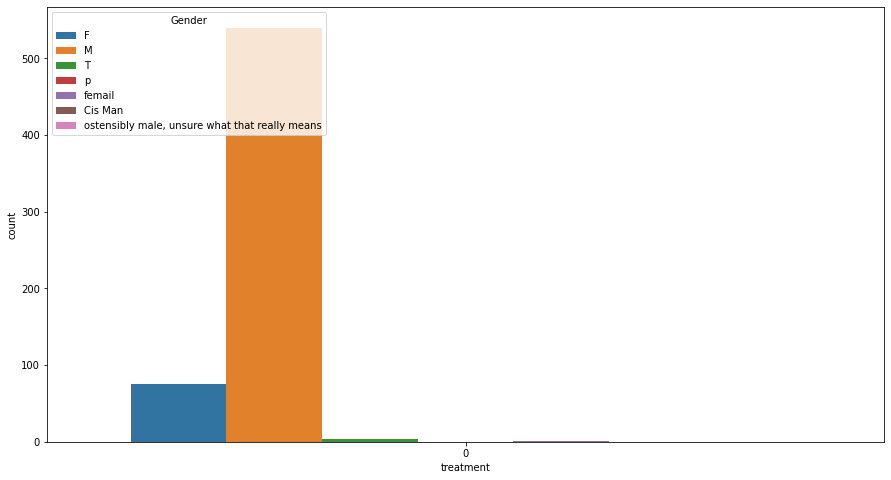

In [24]:
#Checking employees who require treatment are from which gender
sns.countplot(df.treatment,hue=df.Gender,order=df['treatment'].value_counts().iloc[1:2].index)
plt.show()

It can be clearly seen that males requires more treatment

<AxesSubplot:xlabel='treatment', ylabel='count'>

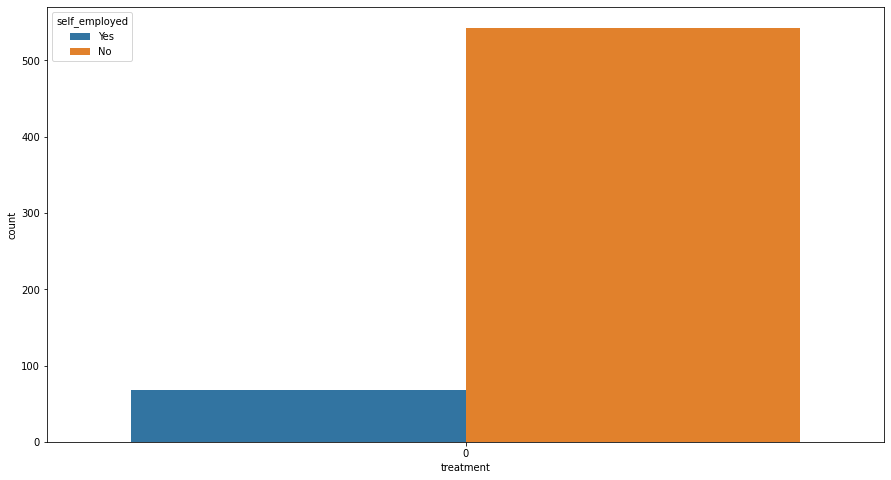

In [25]:
#plotting countplot to see how many self-employed people requires treatment
sns.countplot(df.treatment,hue=df['self_employed'],order=df['treatment'].value_counts().iloc[1:2].index)

We can see that the self-employed people requires less treatment.

<AxesSubplot:xlabel='treatment', ylabel='count'>

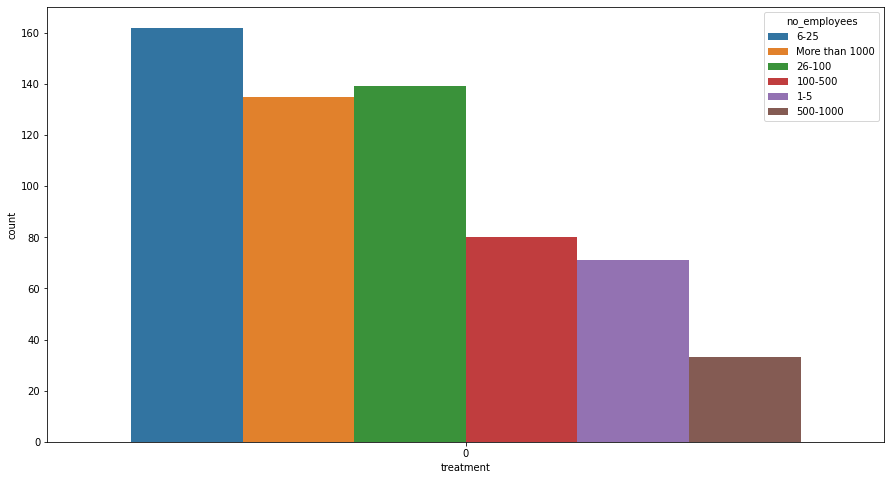

In [26]:
#checking does number of employees in an organisation affects the treatment rate
sns.countplot(df.treatment,hue=df['no_employees'],order=df['treatment'].value_counts().iloc[1:2].index)

We can see from the plot that organisation have 26-100 employees and those having more than 1000 employees requires more treatment.So we can not conclude much from the organisational strength of employees.

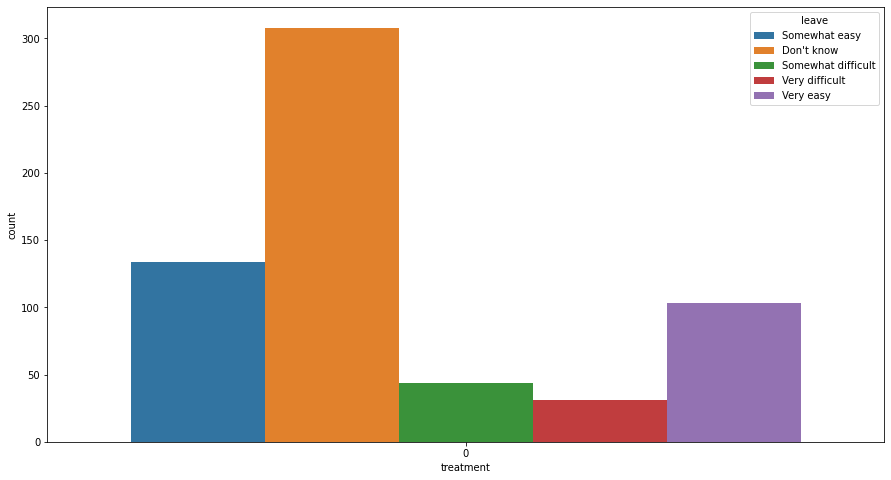

In [27]:
#plot to see does how easy it to take medical leave and its affect on treatment requirement
sns.countplot(df['treatment'],hue=df['leave'],order=df['treatment'].value_counts().iloc[1:2].index)
plt.show()

We can see that the employees who don't know whether they will get leave for medical health condition requires treatment the maximum.

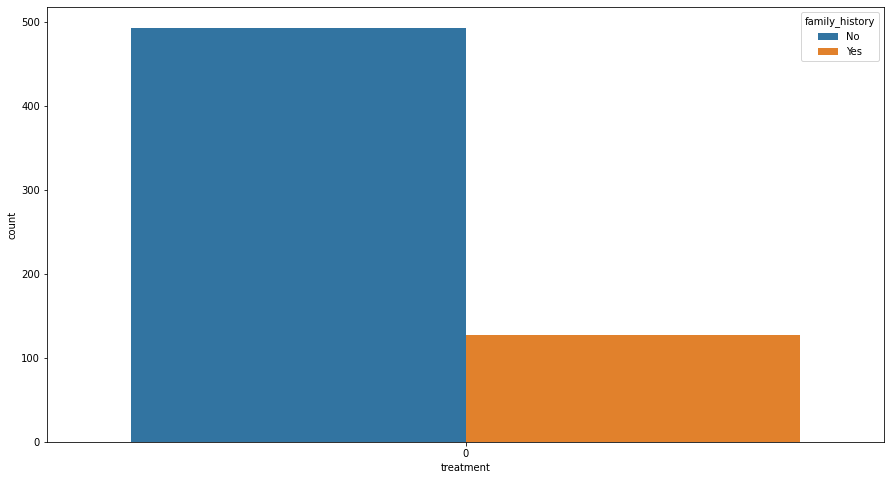

In [28]:
sns.countplot(df.treatment,hue=df['family_history'],order=df['treatment'].value_counts().iloc[1:2].index)
plt.show()

Employees with family history of mental illness needs treatment more than those who doesnot have any family history of mental illness.

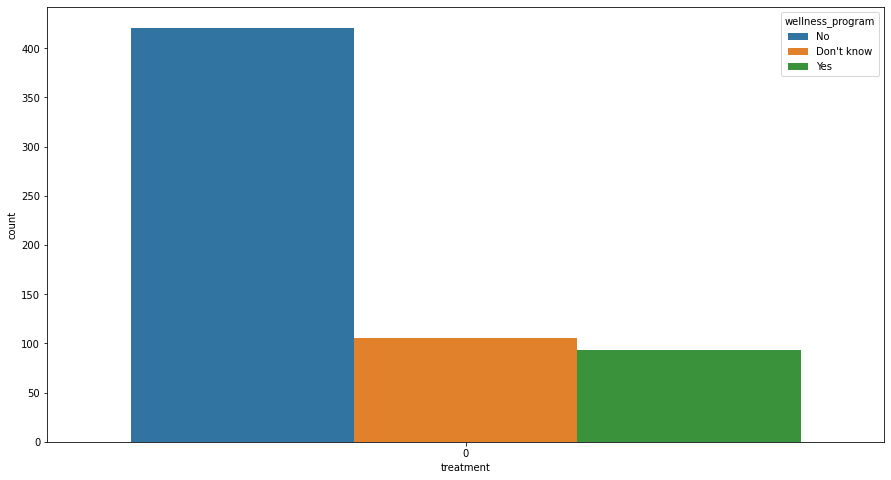

In [29]:
sns.countplot(df['treatment'],hue=df['wellness_program'],order=df['treatment'].value_counts().iloc[1:2].index)
plt.show()

The employer who never discussed mental health as part of an employee wellness program are more prone to treatment requirement.

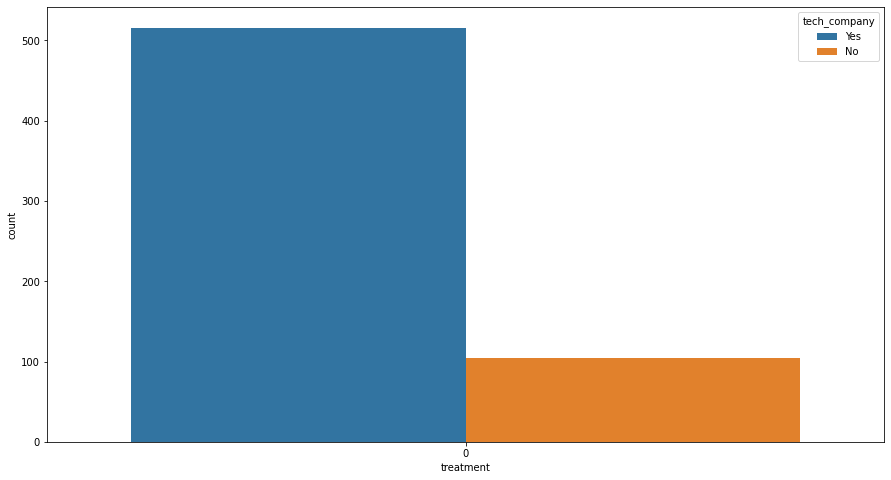

In [30]:
sns.countplot(df['treatment'],hue=df['tech_company'],order=df['treatment'].value_counts().iloc[1:2].index)
plt.show()

From the plot we can see that the tech company employees need more treatment than oganization employees.

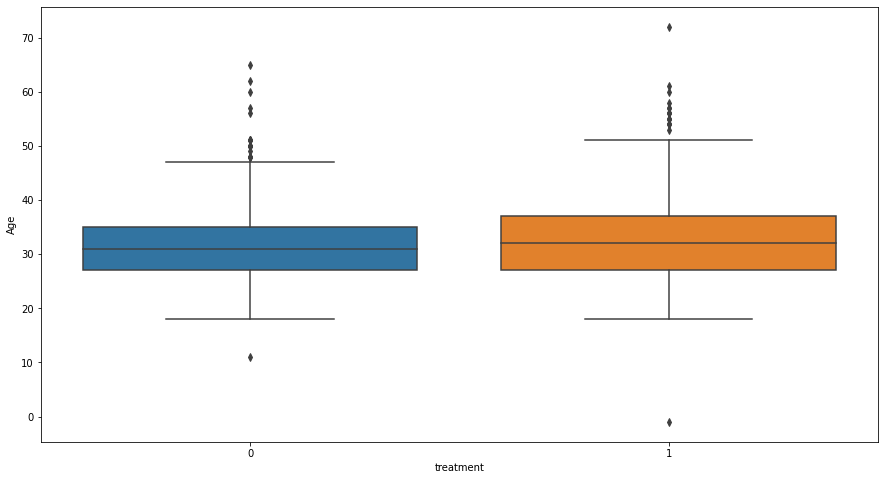

In [31]:
#plotting the bar plot for age to see if there is any outlier
sns.boxplot(x=df.treatment,y=df['Age'])
plt.show()

We see that age of people who requires treatment are in the range of 20-50years approximately.

From the line plot we can see that in 3 days all the data have been collected.Maximum data has been collected on 28-08-2014.

# Finding the missing values

In [32]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
Percent = ((Total*100)/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
comments,1091,87.071030
state,513,40.941740
work_interfere,262,20.909816
self_employed,18,1.436552
Age,0,0.000000
leave,0,0.000000
Date,0,0.000000
obs_consequence,0,0.000000
mental_vs_physical,0,0.000000
phys_health_interview,0,0.000000


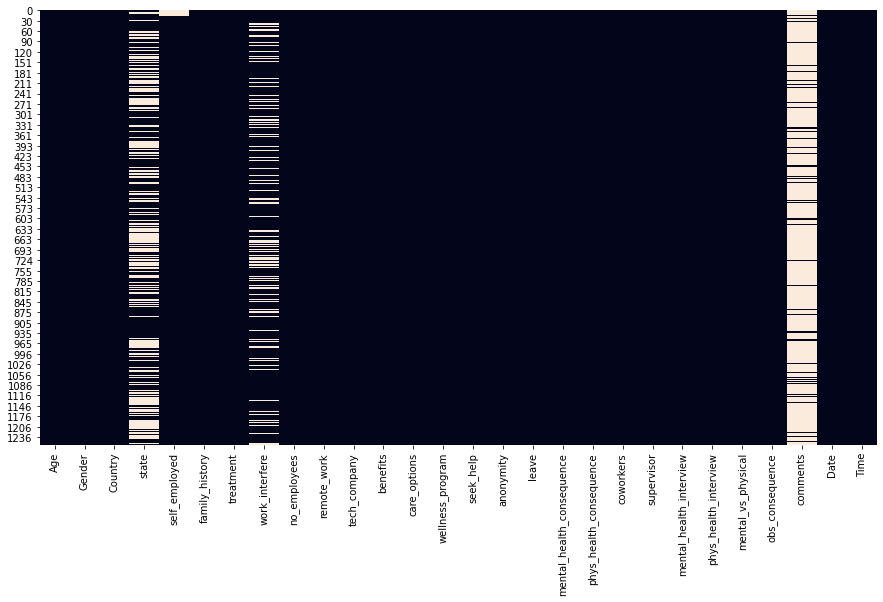

In [33]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

# Handling the missing values

In [34]:
df.drop('comments',axis=1,inplace=True)
df['work_interfere']=df['work_interfere'].fillna('Not mentioned')
df.drop(['state','Country'],axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

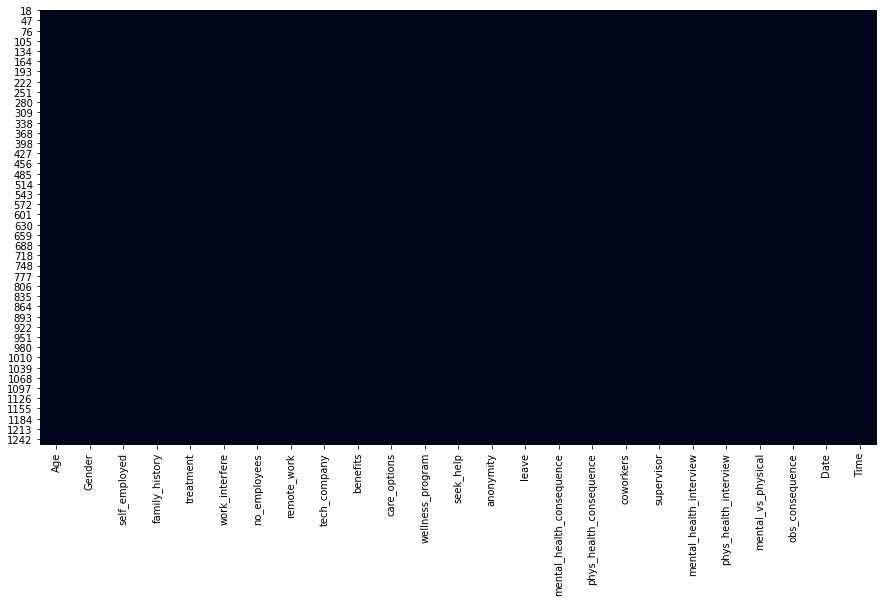

In [35]:
#Checking if all the null values have been handled or not
sns.heatmap(df.isnull(),cbar=False,color='black')
plt.show()

# Preparing the data for building model

In [36]:
#Creating two dataframes df_features and df_target,df_features contains all the important features which we will dummy encode
#df_target which contains the target variable
df_features=df.drop(['treatment', 'Age','Date', 'Time'],axis=1)
df_target=df['treatment']

In [37]:
#dummy encoding the feature(categorical) variables
df_dummy=pd.get_dummies(df_features,drop_first=True)

In [38]:
#storing the features in X and the target in y variable
X=df_dummy
y=pd.DataFrame(df_target)

# Creating generalised functions

In [39]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [40]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [41]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [42]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))

    # plot the grid
    plt.grid(True)

In [43]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [44]:
# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (864, 48)
y_train (864, 1)
X_test (371, 48)
y_test (371, 1)


# Model 1(Support vector machine)

In [45]:
# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svc_model=svclassifier.fit(X_train, y_train)


In [46]:
# predict the values
y_pred = svclassifier.predict(X_test)

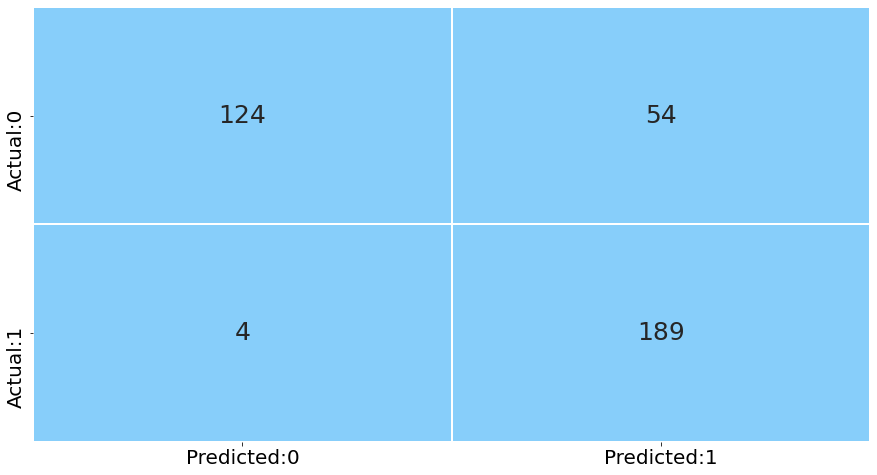

In [47]:
# call the function to plot the confusion matrix
plot_confusion_matrix(svc_model)

In [48]:
# compute the performance measures on test data
test_report = get_test_report(svc_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       178
           1       0.78      0.98      0.87       193

    accuracy                           0.84       371
   macro avg       0.87      0.84      0.84       371
weighted avg       0.87      0.84      0.84       371



In [49]:
# compute kappa score on test set
kappa_value = kappa_score(svc_model)

# print the kappa value
print(kappa_value)

0.6833632537743901


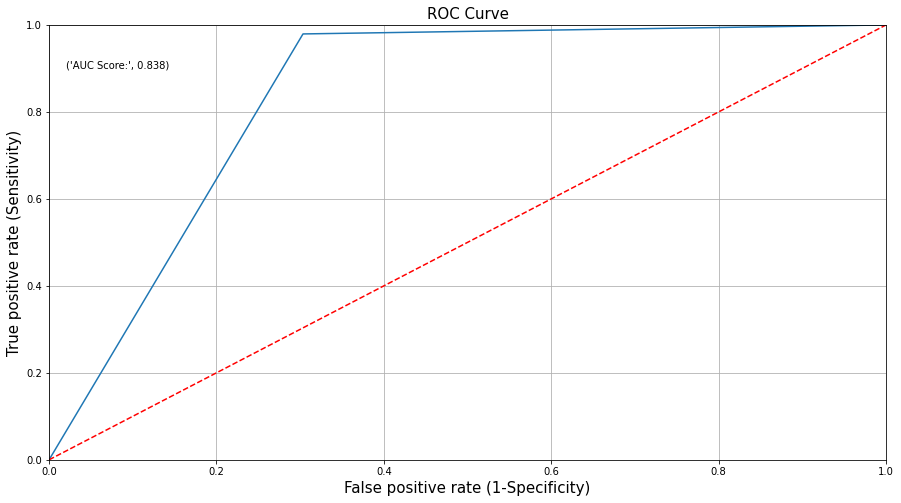

In [50]:
plot_roc(svc_model)

In [51]:
update_score_card(model_name='SVM')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972


# Model 2(Support vector machine using kernel(rbf))

In [52]:
# build the model
svclassifier = SVC(kernel='rbf')
# fit the model
svm_rbf=svclassifier.fit(X_train, y_train)

In [53]:
# predict the values
y_pred= svclassifier.predict(X_test)


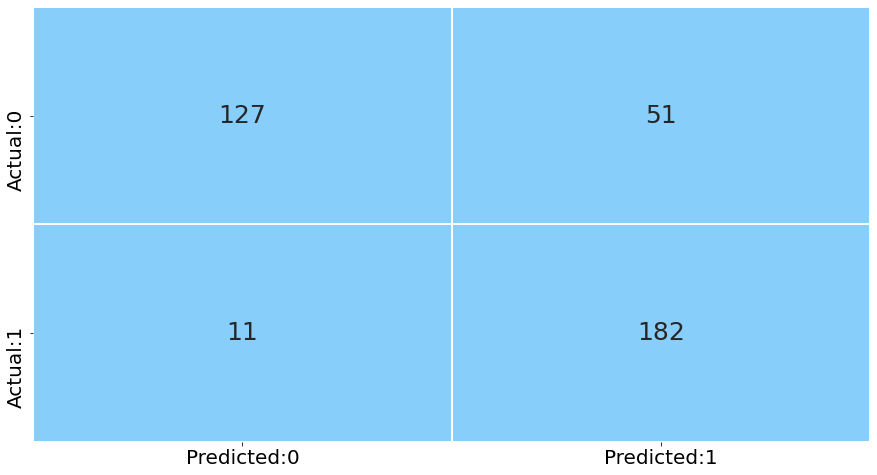

In [54]:
plot_confusion_matrix(svm_rbf)

In [55]:
test_report=get_test_report(svm_rbf)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       178
           1       0.78      0.94      0.85       193

    accuracy                           0.83       371
   macro avg       0.85      0.83      0.83       371
weighted avg       0.85      0.83      0.83       371



In [56]:
# compute kappa score on test set
kappa_value = kappa_score(svm_rbf)

# print the kappa value
print(kappa_value)

0.6622716861455336


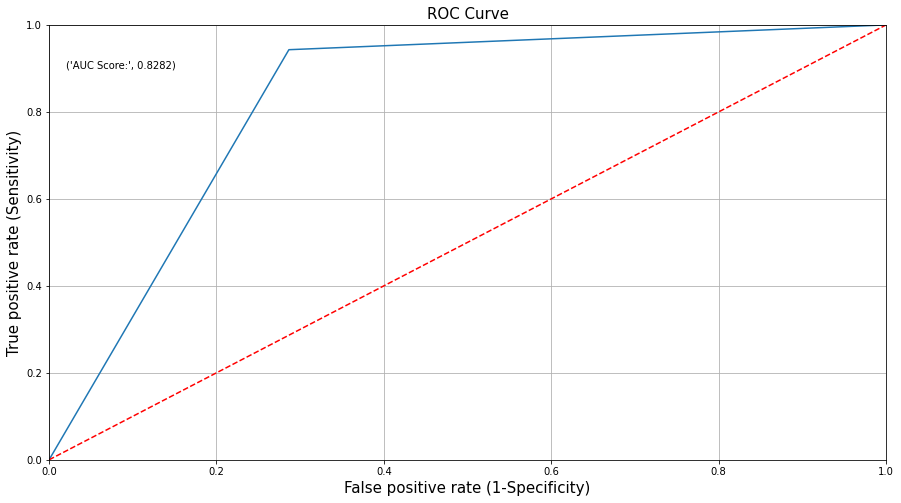

In [57]:
plot_roc(svm_rbf)

In [58]:
update_score_card(model_name='SVM with rbf')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460


# Model 3 (Support vector machine using kernel(sigmoid))

In [59]:
# build the model
svclassifier = SVC(kernel='sigmoid')
# fit the model
svm_sigmoid=svclassifier.fit(X_train, y_train)

In [60]:
# predict the values
y_pred  = svclassifier.predict(X_test)

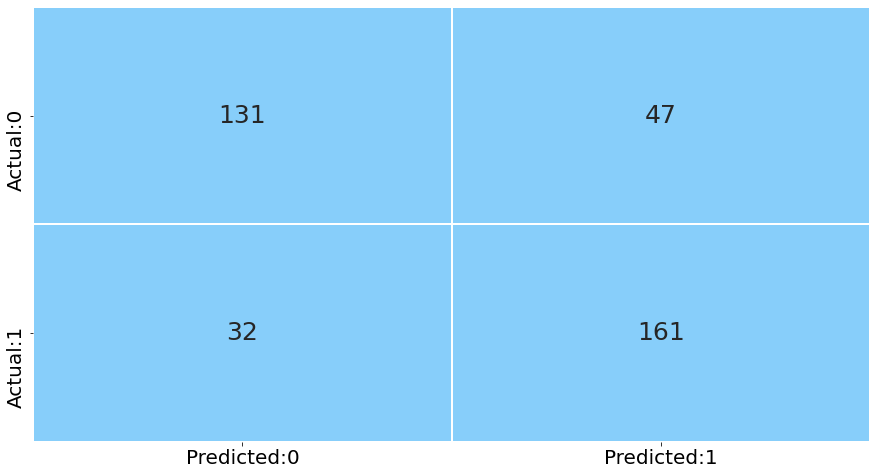

In [61]:
plot_confusion_matrix(svm_sigmoid)

In [62]:
test_report=get_test_report(svm_sigmoid)
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       178
           1       0.77      0.83      0.80       193

    accuracy                           0.79       371
   macro avg       0.79      0.79      0.79       371
weighted avg       0.79      0.79      0.79       371



In [63]:
# compute kappa score on test set
kappa_value = kappa_score(svm_sigmoid)

# print the kappa value
print(kappa_value)

0.5720251741308062


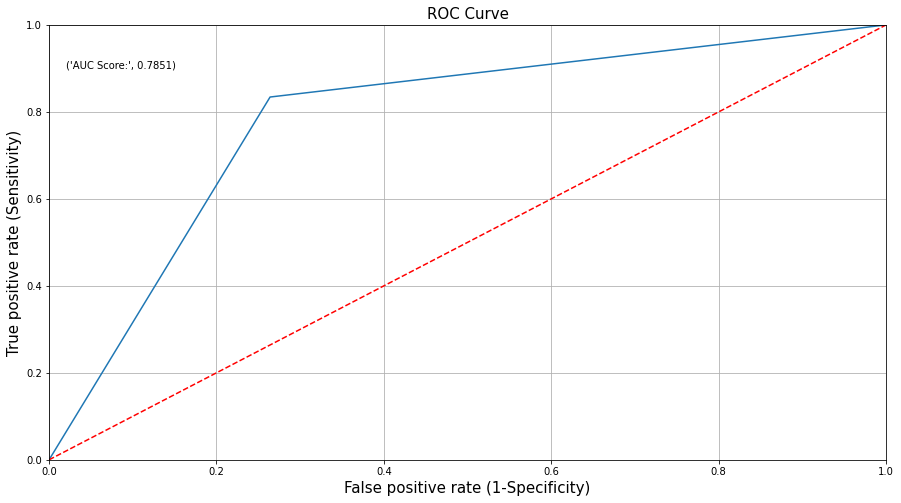

In [64]:
plot_roc(svm_sigmoid)

In [65]:
update_score_card(model_name='SVM using sigmoid')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993


# Model 4(Support vector machine using kernel(Polynomial))

In [66]:
# build the model
svclassifier = SVC(kernel='poly')
# fit the model
svm_poly=svclassifier.fit(X_train, y_train)

In [67]:
# predict the values
y_pred  = svclassifier.predict(X_test)

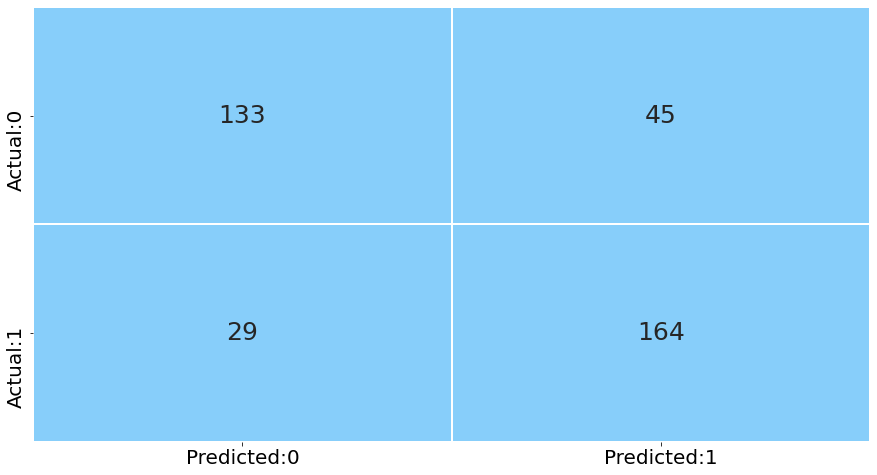

In [68]:
plot_confusion_matrix(svm_poly)

In [69]:
test_report=get_test_report(svm_poly)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       178
           1       0.78      0.85      0.82       193

    accuracy                           0.80       371
   macro avg       0.80      0.80      0.80       371
weighted avg       0.80      0.80      0.80       371



In [70]:
# compute kappa score on test set
kappa_value = kappa_score(svm_poly)

# print the kappa value
print(kappa_value)

0.599024361745633


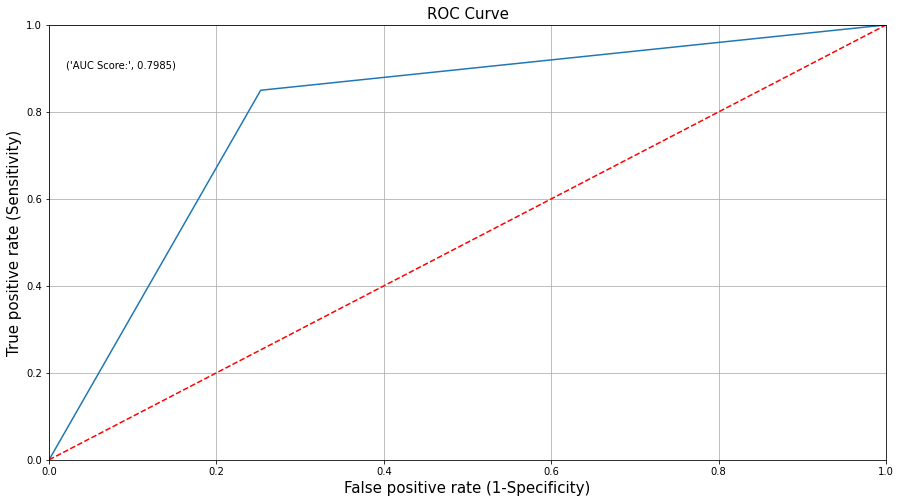

In [71]:
plot_roc(svm_poly)

In [72]:
update_score_card(model_name='SVM with kernel(polynomial)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920


# Model 5(Support vector machine using kernel and degree=2) 

In [73]:
# build the model
svclassifier_Poly = SVC(kernel='poly', degree = 2, gamma = 'auto')
# fit the model
svm=svclassifier_Poly.fit(X_train, y_train)

In [74]:
# predict the values
y_pred  = svclassifier_Poly.predict(X_test)

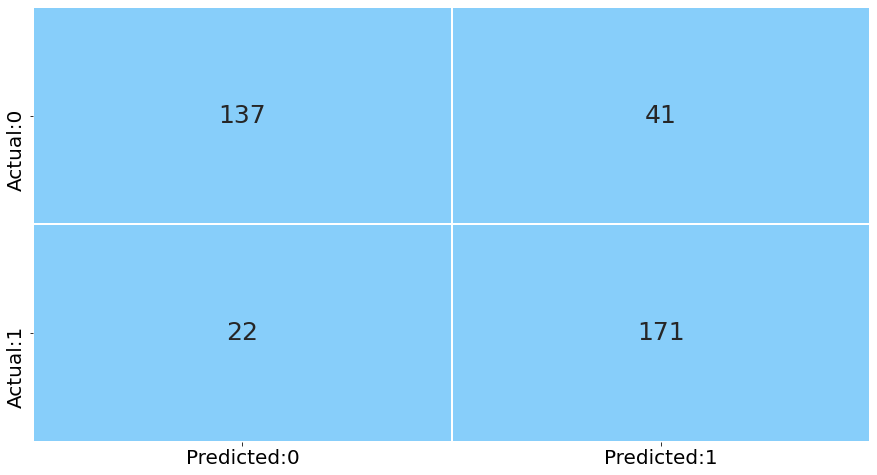

In [75]:
plot_confusion_matrix(svm)

In [76]:
test_report=get_test_report(svm)
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       178
           1       0.81      0.89      0.84       193

    accuracy                           0.83       371
   macro avg       0.83      0.83      0.83       371
weighted avg       0.83      0.83      0.83       371



In [77]:
# compute kappa score on test set
kappa_value = kappa_score(svm)

# print the kappa value
print(kappa_value)

0.6584043377226956


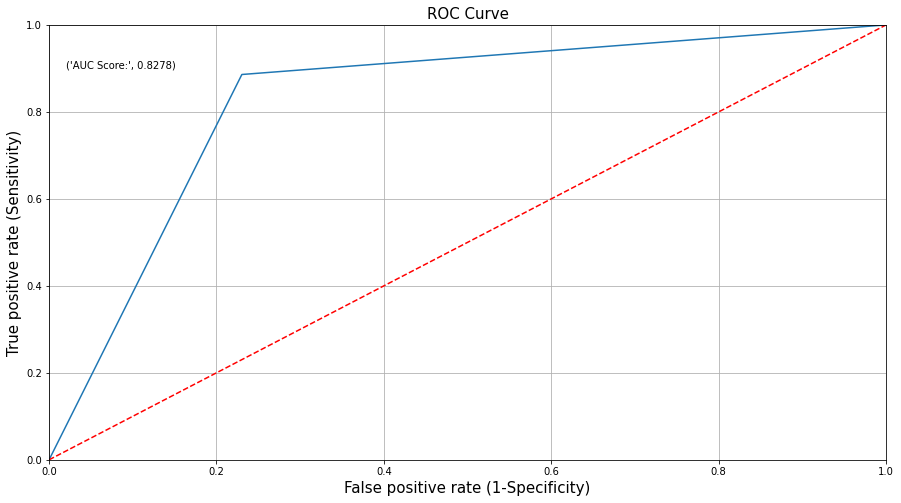

In [78]:
plot_roc(svm)

In [79]:
update_score_card(model_name='SVM with kernel(ploynomial) with degree 2')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920
4,SVM with kernel(ploynomial) with degree 2,0.827837,0.806604,0.886010,0.830189,0.658404,0.844444


#  Model 6(Support vector machine using grid search)

In [80]:
# degree: Degree of the polynomial
# C: value of C parameter or regularisation parameter
# gamma:
param_grid = { 
    'degree': [2,4,6,8,10], 
    'gamma' : ['auto','scale' ],
    'C': [0.5, 1,1.5]
}

In [81]:
CV_rfc = GridSearchCV(estimator= svclassifier_Poly, param_grid=param_grid, scoring='accuracy', cv= 5)
# fit the model
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(degree=2, gamma='auto', kernel='poly'),
             param_grid={'C': [0.5, 1, 1.5], 'degree': [2, 4, 6, 8, 10],
                         'gamma': ['auto', 'scale']},
             scoring='accuracy')

In [82]:
# find the best parameters
CV_rfc.best_params_

{'C': 0.5, 'degree': 2, 'gamma': 'scale'}

In [83]:
# build the model with best parameters obtained from above code
svclassifier_Poly_Grid = SVC(kernel='poly', 
                            degree = 2, 
                            gamma = 'scale',
                           C = 1 )
# fit the model
svm=svclassifier_Poly_Grid.fit(X_train, y_train)

In [84]:
# predict the values
y_pred= svclassifier_Poly_Grid.predict(X_test)

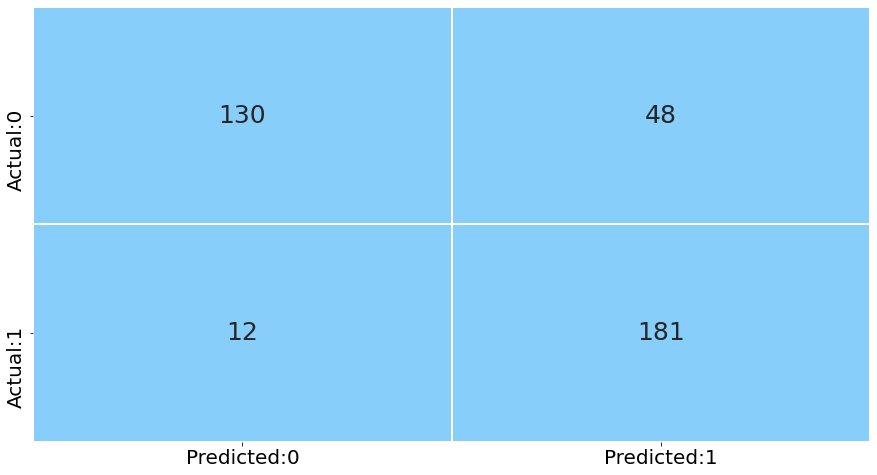

In [85]:
plot_confusion_matrix(svm)

In [86]:
test_report=get_test_report(svm)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       178
           1       0.79      0.94      0.86       193

    accuracy                           0.84       371
   macro avg       0.85      0.83      0.84       371
weighted avg       0.85      0.84      0.84       371



In [87]:
# compute kappa score on test set
kappa_value = kappa_score(svm)

# print the kappa value
print(kappa_value)

0.6734538199741815


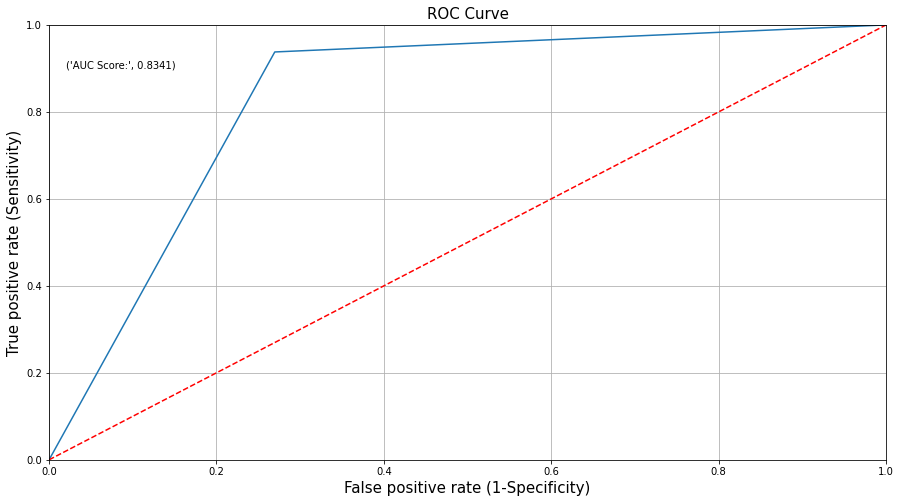

In [88]:
plot_roc(svm)

In [89]:
update_score_card(model_name='SVM with grid search CV ')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920
4,SVM with kernel(ploynomial) with degree 2,0.827837,0.806604,0.886010,0.830189,0.658404,0.844444
5,SVM with grid search CV,0.834080,0.790393,0.937824,0.838275,0.673454,0.857820


# Model 7(Decision Tree)

In [90]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train)

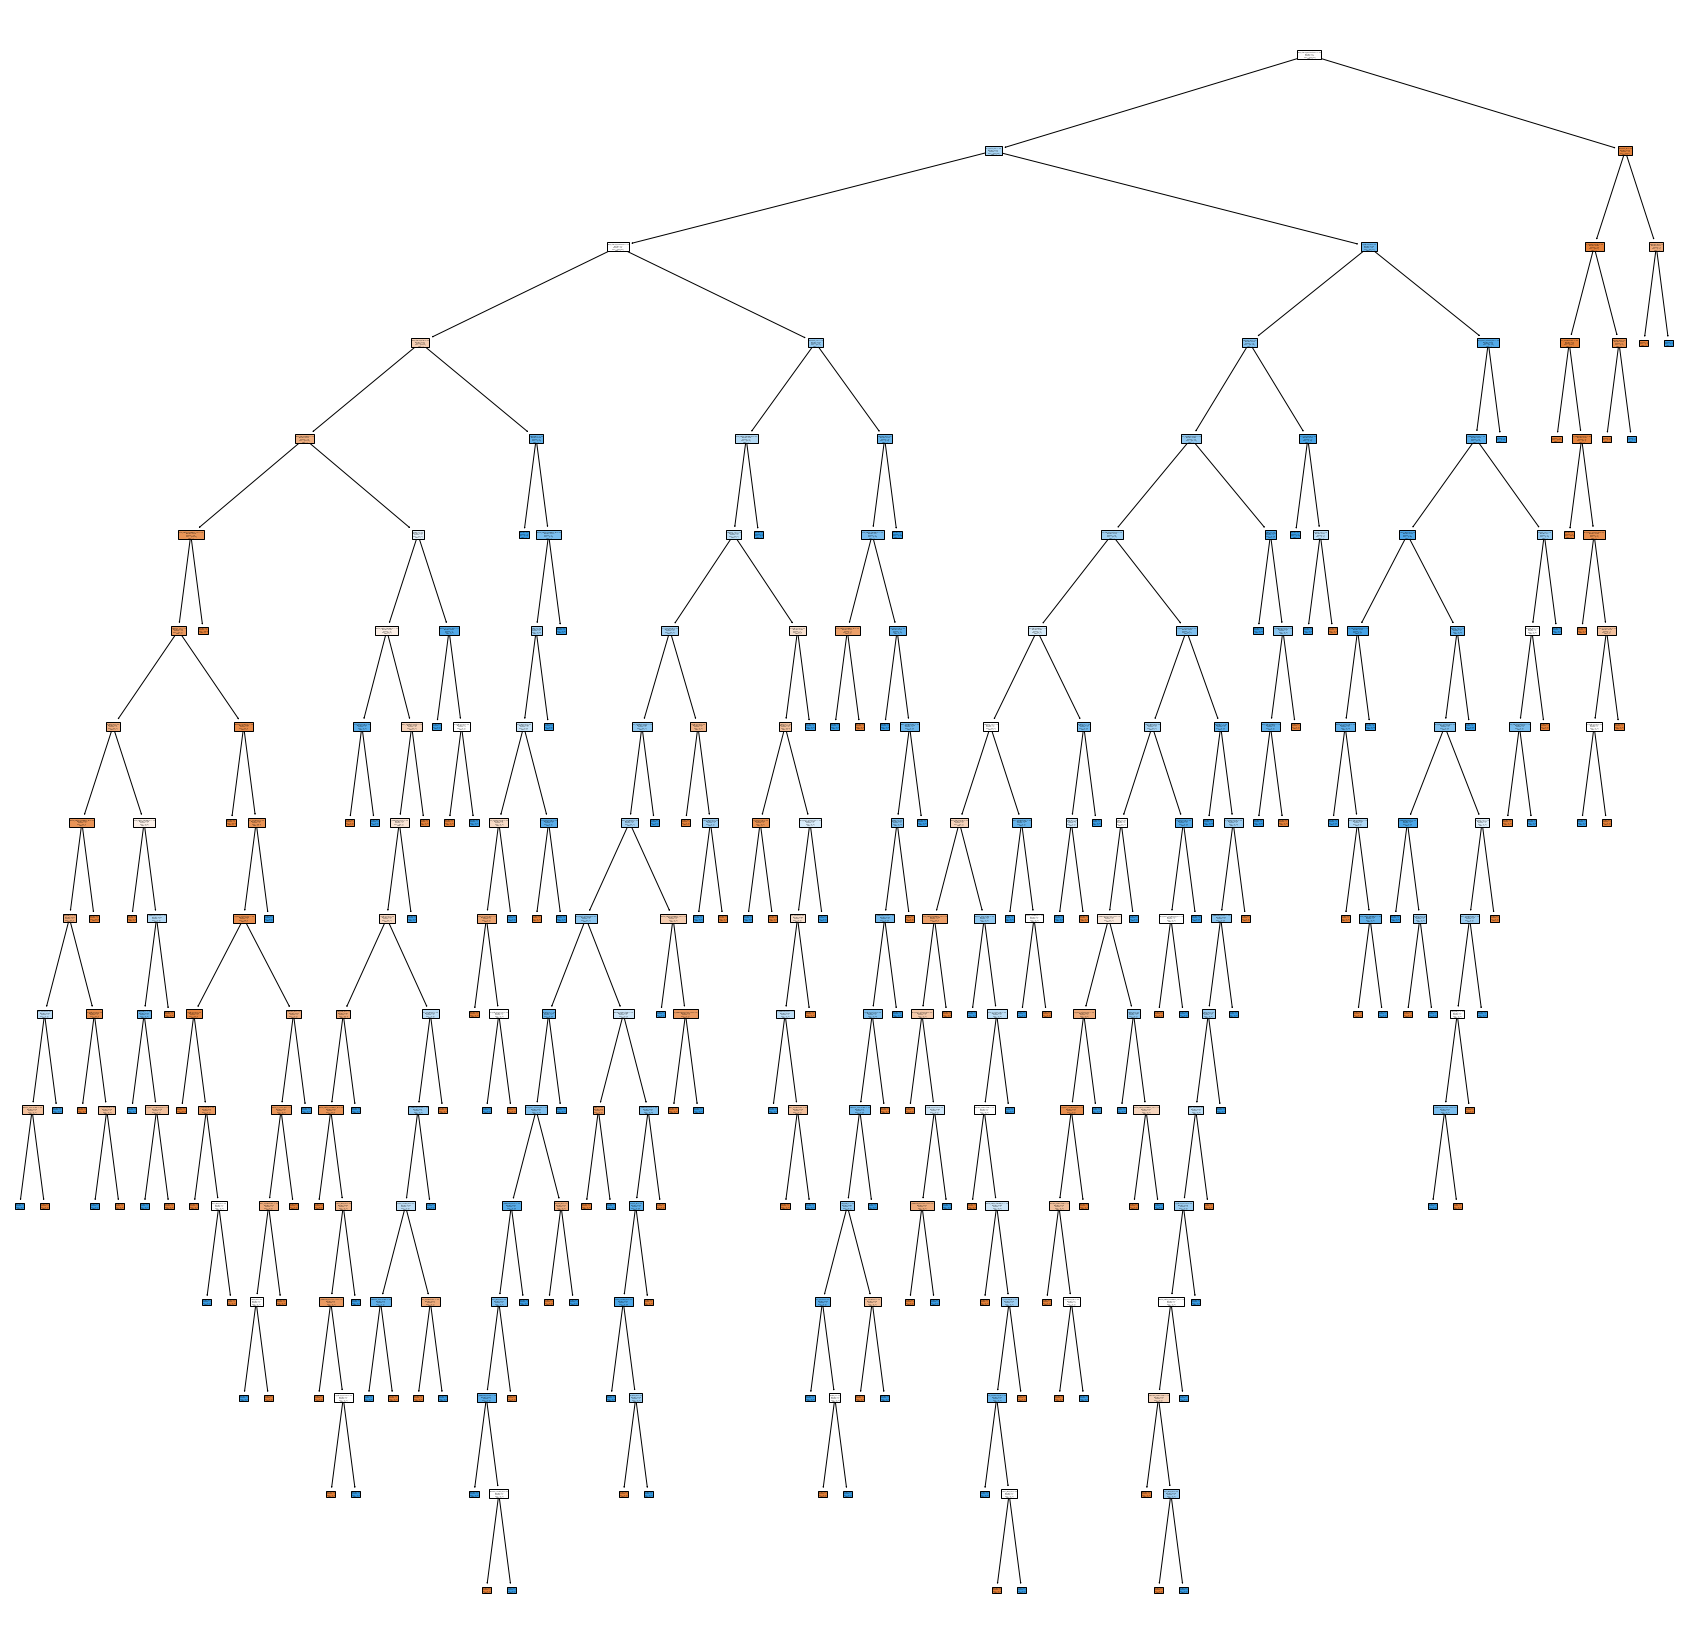

In [91]:
labels=X_train.columns

#plot the decisin tree
fig=plt.figure(figsize=(30,30))
z=tree.plot_tree(decision_tree_model,
                feature_names=labels,
                class_names=['0','1'],
                filled=True)

In [92]:
y_pred=decision_tree_model.predict(X_test)

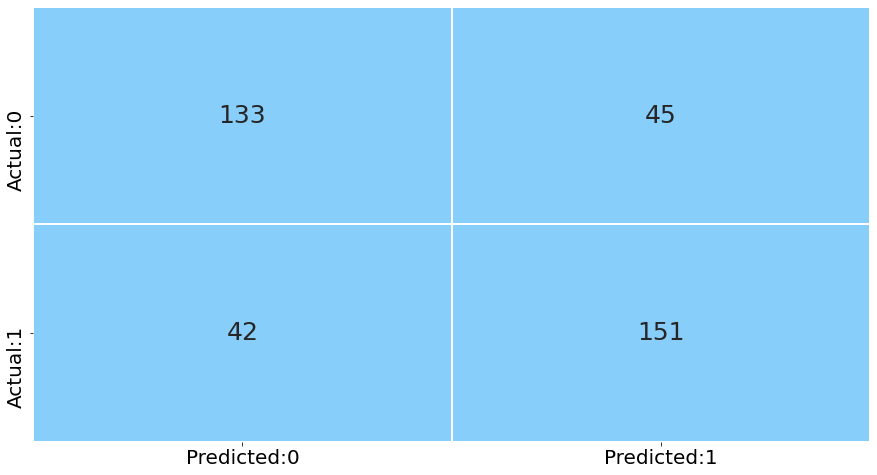

In [93]:
plot_confusion_matrix(decision_tree_model)

In [94]:
kappa_score(decision_tree_model)

0.5299215006626568

In [95]:
test_report=get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       178
           1       0.77      0.78      0.78       193

    accuracy                           0.77       371
   macro avg       0.77      0.76      0.76       371
weighted avg       0.77      0.77      0.77       371



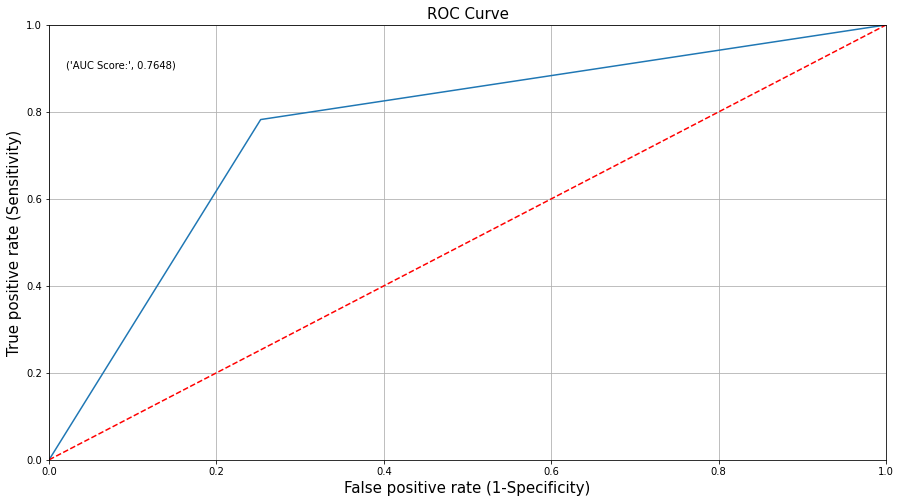

In [96]:
plot_roc(decision_tree)

In [97]:
update_score_card(model_name='Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920
4,SVM with kernel(ploynomial) with degree 2,0.827837,0.806604,0.886010,0.830189,0.658404,0.844444
5,SVM with grid search CV,0.834080,0.790393,0.937824,0.838275,0.673454,0.857820
6,Decision Tree,0.764787,0.770408,0.782383,0.765499,0.529922,0.776350


# Model 8(Decision Tree using pruning) 

In [98]:
prune=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=25,random_state=10)
decision_tree_prune=prune.fit(X_train,y_train)

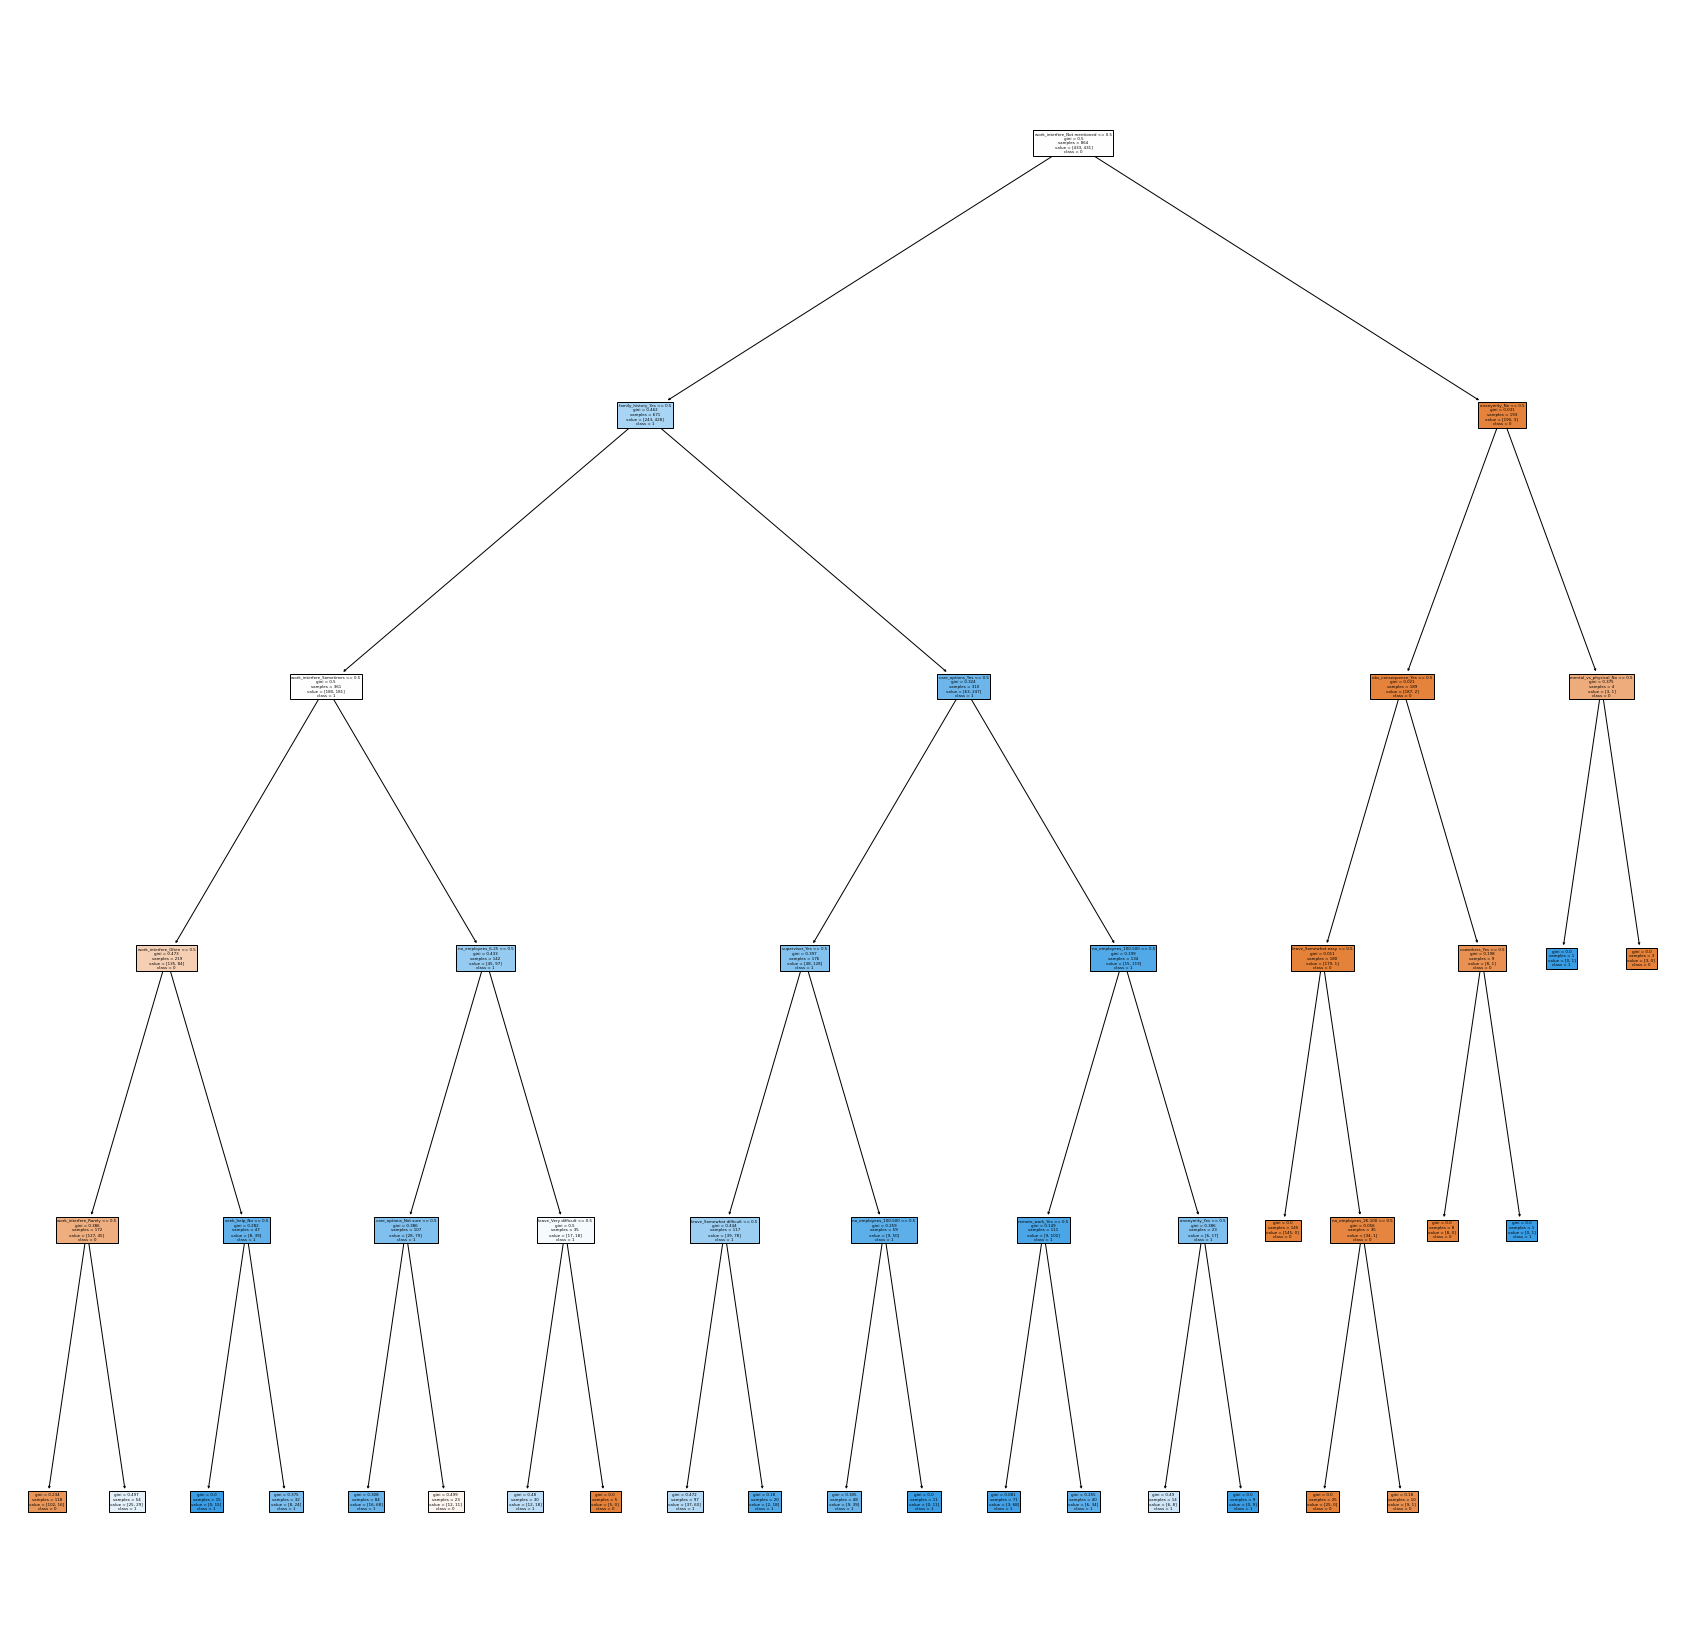

In [99]:
labels=X_train.columns
fig=plt.figure(figsize=(30,30))
z=tree.plot_tree(decision_tree_prune,
                feature_names=labels,
                class_names=['0','1'],
                filled=True)

In [100]:
y_pred=decision_tree_prune.predict(X_test)

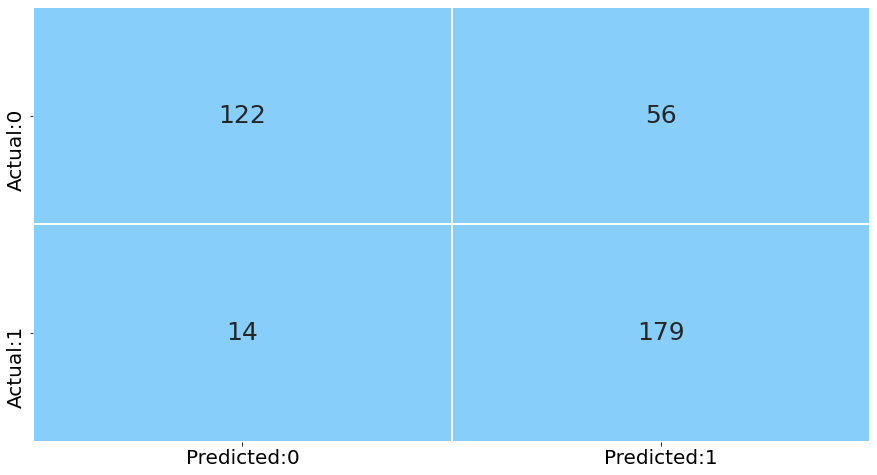

In [101]:
plot_confusion_matrix(decision_tree_prune)

In [102]:
test_report=get_test_report(decision_tree_prune)
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       178
           1       0.76      0.93      0.84       193

    accuracy                           0.81       371
   macro avg       0.83      0.81      0.81       371
weighted avg       0.83      0.81      0.81       371



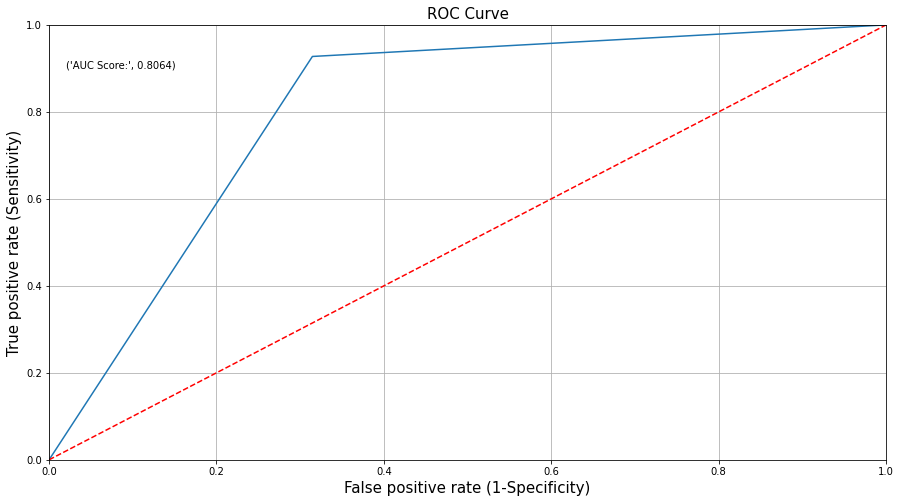

In [103]:
plot_roc(decision_tree_prune)

In [104]:
update_score_card(model_name='Decision Tree Pruned')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920
4,SVM with kernel(ploynomial) with degree 2,0.827837,0.806604,0.886010,0.830189,0.658404,0.844444
5,SVM with grid search CV,0.834080,0.790393,0.937824,0.838275,0.673454,0.857820
6,Decision Tree,0.764787,0.770408,0.782383,0.765499,0.529922,0.776350
7,Decision Tree Pruned,0.806427,0.761702,0.927461,0.811321,0.618526,0.836449


# Model 9(Decision Tree using grid search)

In [105]:
tuned_parameters=[{'criterion':['gini','entropy'],
                  'min_samples_split':[10,20,30],
                  'max_depth':[3,5,7],
                  'min_samples_leaf':[15,20,25,30,35],
                  'max_leaf_nodes':[5,10,15,20,25]
                  }]

In [106]:
tree_classification=DecisionTreeClassifier(random_state=10)
grid=GridSearchCV(estimator=tree_classification,
                 param_grid=tuned_parameters,
                 cv=10)
dt_grid=grid.fit(X_train,y_train)

print("best parameters:",dt_grid.best_params_,'\n')

best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 35, 'min_samples_split': 10} 



In [107]:
dt_grid_model=DecisionTreeClassifier(criterion=dt_grid.best_params_.get('criterion'),
                                     max_depth=dt_grid.best_params_.get("max_depth"),
                                     max_leaf_nodes=dt_grid.best_params_.get("max_leaf_nodes"),
                                     min_samples_leaf=dt_grid.best_params_.get("max_leaf_nodes"),
                                     min_samples_split=dt_grid.best_params_.get("min_samples_split"),
                                     random_state=10)
dt_grid_model=dt_grid_model.fit(X_train,y_train)

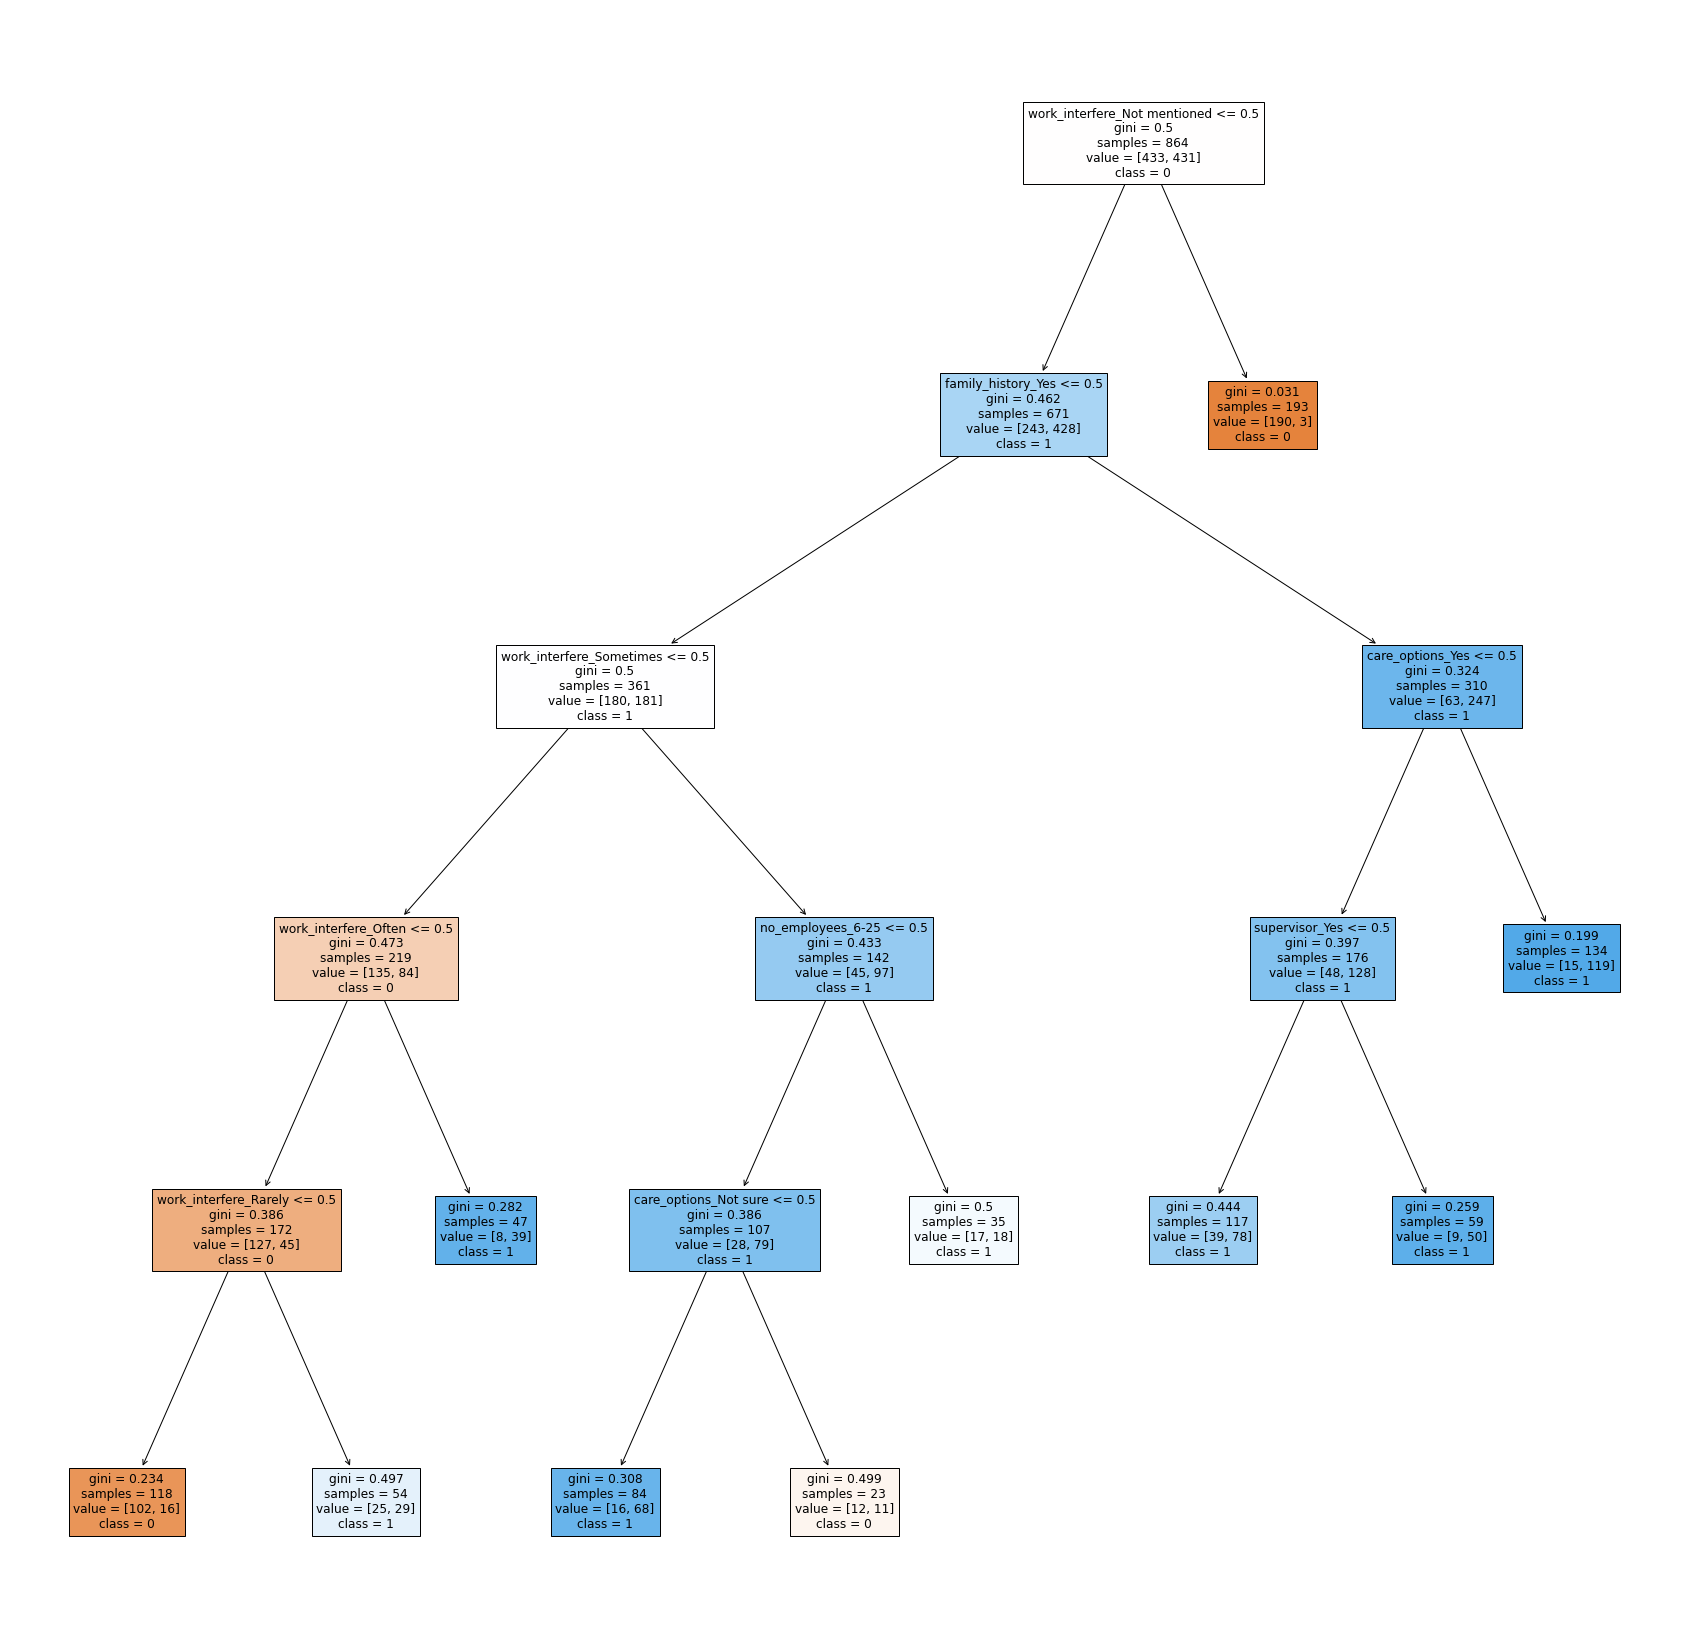

In [108]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_grid_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [109]:
y_pred=dt_grid_model.predict(X_test)

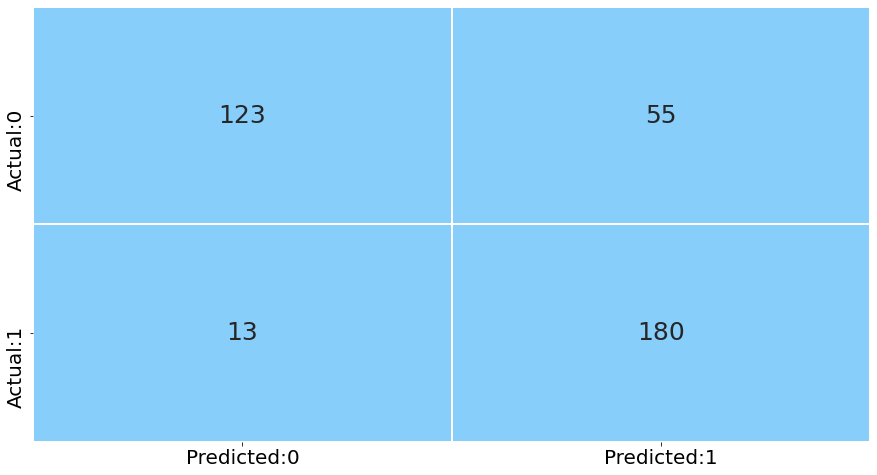

In [110]:
plot_confusion_matrix(dt_grid_model)

In [111]:
test_report=get_test_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       178
           1       0.77      0.93      0.84       193

    accuracy                           0.82       371
   macro avg       0.84      0.81      0.81       371
weighted avg       0.83      0.82      0.81       371



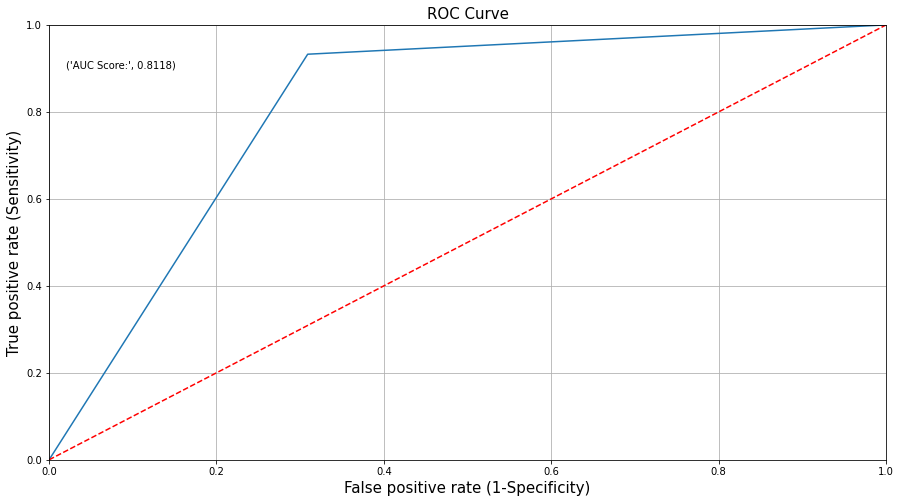

In [112]:
plot_roc(dt_grid_model)

In [113]:
update_score_card(model_name='Decision Tree using grid search')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920
4,SVM with kernel(ploynomial) with degree 2,0.827837,0.806604,0.886010,0.830189,0.658404,0.844444
5,SVM with grid search CV,0.834080,0.790393,0.937824,0.838275,0.673454,0.857820
6,Decision Tree,0.764787,0.770408,0.782383,0.765499,0.529922,0.776350
7,Decision Tree Pruned,0.806427,0.761702,0.927461,0.811321,0.618526,0.836449
8,Decision Tree using grid search,0.811827,0.765957,0.932642,0.816712,0.629425,0.841121


# Model 10(Ensemble Model)

In [114]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [115]:
feat_labels = X.columns.values
# Print the name and gini importance of each feature
feature_importance = []
for feature in zip(feat_labels, clf.feature_importances_):
    #rint(feature)
    feature_importance.append(feature)

In [116]:
feature_importance

[('Gender_F', 0.016362472889150485),
 ('Gender_M', 0.018319713024678528),
 ('Gender_T', 0.0024715662560005785),
 ('Gender_femail', 0.00020308547332635542),
 ('Gender_ostensibly male, unsure what that really means',
  0.00030498018012509897),
 ('Gender_p', 3.496530209308163e-05),
 ('self_employed_Yes', 0.01344679651875),
 ('family_history_Yes', 0.07356039225630635),
 ('work_interfere_Not mentioned', 0.12800893863013402),
 ('work_interfere_Often', 0.04544629628960188),
 ('work_interfere_Rarely', 0.028562481665887447),
 ('work_interfere_Sometimes', 0.09810056410452644),
 ('no_employees_100-500', 0.013579190967128603),
 ('no_employees_26-100', 0.01681548708671244),
 ('no_employees_500-1000', 0.0063225526066461755),
 ('no_employees_6-25', 0.016676255569179368),
 ('no_employees_More than 1000', 0.013128629392142408),
 ('remote_work_Yes', 0.02215614485728656),
 ('tech_company_Yes', 0.016121581969284482),
 ('benefits_No', 0.019177371975873412),
 ('benefits_Yes', 0.023895824420879713),
 ('care_

In [117]:
# features that have an importance of more than 0.01
sfm = SelectFromModel(clf, threshold=0.01)

In [118]:
# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [119]:
selected_features = []
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])

In [120]:
selected_features

['Gender_F',
 'Gender_M',
 'self_employed_Yes',
 'family_history_Yes',
 'work_interfere_Not mentioned',
 'work_interfere_Often',
 'work_interfere_Rarely',
 'work_interfere_Sometimes',
 'no_employees_100-500',
 'no_employees_26-100',
 'no_employees_6-25',
 'no_employees_More than 1000',
 'remote_work_Yes',
 'tech_company_Yes',
 'benefits_No',
 'benefits_Yes',
 'care_options_Not sure',
 'care_options_Yes',
 'wellness_program_No',
 'wellness_program_Yes',
 'seek_help_No',
 'seek_help_Yes',
 'anonymity_Yes',
 'leave_Somewhat difficult',
 'leave_Somewhat easy',
 'leave_Very difficult',
 'leave_Very easy',
 'mental_health_consequence_No',
 'mental_health_consequence_Yes',
 'phys_health_consequence_No',
 'coworkers_Some of them',
 'coworkers_Yes',
 'supervisor_Some of them',
 'supervisor_Yes',
 'mental_health_interview_No',
 'phys_health_interview_No',
 'phys_health_interview_Yes',
 'mental_vs_physical_No',
 'mental_vs_physical_Yes',
 'obs_consequence_Yes']

In [121]:
data_selected = df_dummy[selected_features]
data_selected.head()

,Gender_F,Gender_M,self_employed_Yes,family_history_Yes,work_interfere_Not mentioned,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,no_employees_26-100,no_employees_6-25,no_employees_More than 1000,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
18,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1
19,0,1,1,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0
20,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0
21,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0
22,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0


In [122]:
data_standardised = pd.get_dummies(data_selected,drop_first=True)

In [123]:
# let us now split the dataset into train & test
X = data_standardised
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (864, 40)
X_test  (371, 40)
y_train  (864,)
y_test  (371,)


In [124]:
# build the model
gnb = GaussianNB()

# define the ovr strategy
GNB = OneVsRestClassifier(gnb)

# fit the model
GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [125]:
# predict the values
y_pred= GNB.predict(X_test)

In [126]:
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       178
           1       0.76      0.92      0.84       193

    accuracy                           0.81       371
   macro avg       0.83      0.81      0.81       371
weighted avg       0.83      0.81      0.81       371



In [127]:
# compute kappa score on test set
kappa_value = kappa_score(GNB)

# print the kappa value
print(kappa_value)

0.6186938391965702


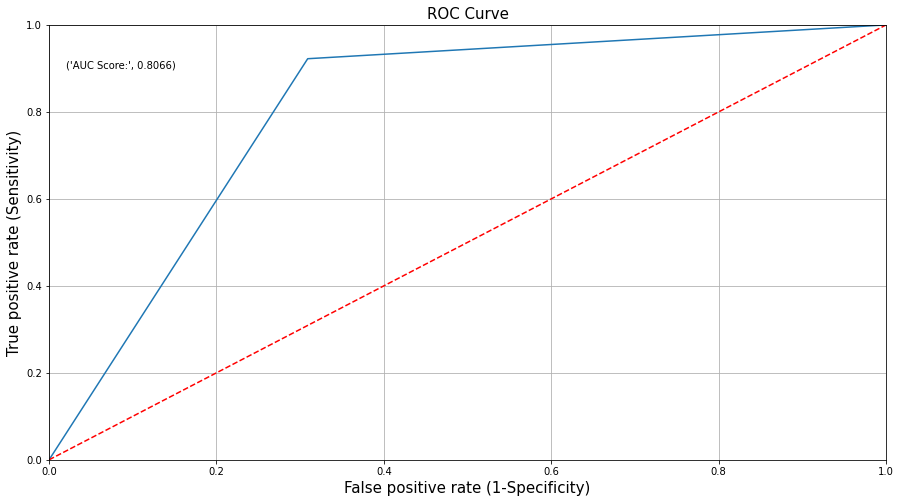

In [128]:
plot_roc(GNB)

In [129]:
update_score_card(model_name = 'Random Forest')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920
4,SVM with kernel(ploynomial) with degree 2,0.827837,0.806604,0.886010,0.830189,0.658404,0.844444
5,SVM with grid search CV,0.834080,0.790393,0.937824,0.838275,0.673454,0.857820
6,Decision Tree,0.764787,0.770408,0.782383,0.765499,0.529922,0.776350
7,Decision Tree Pruned,0.806427,0.761702,0.927461,0.811321,0.618526,0.836449
8,Decision Tree using grid search,0.811827,0.765957,0.932642,0.816712,0.629425,0.841121
9,Random Forest,0.806646,0.763948,0.922280,0.811321,0.618694,0.835681


# Model 11(Logistics regression using SGD)

In [130]:
X=df_dummy
y=pd.DataFrame(df_target)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (864, 48)
y_train (864, 1)
X_test (371, 48)
y_test (371, 1)


In [132]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# fit the model on scaled training data
logreg_with_SGD = SGD.fit(X_train, y_train)

In [133]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(X_test)

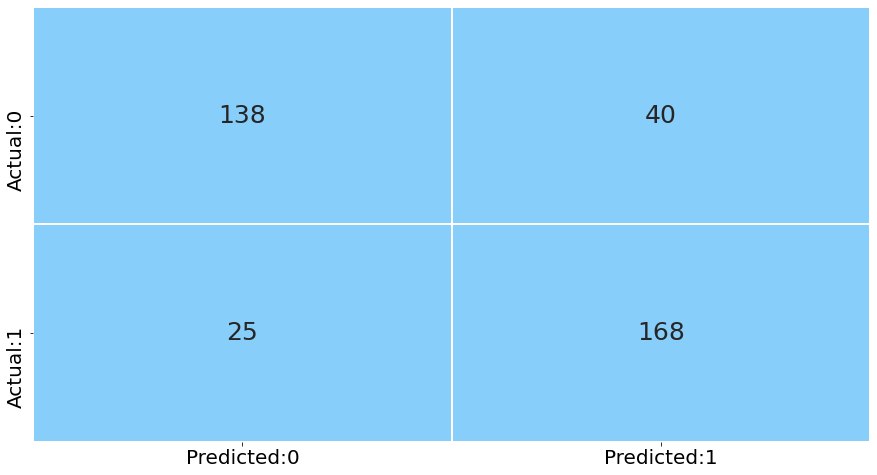

In [134]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
plot_confusion_matrix(logreg_with_SGD)

In [135]:
test_report = get_test_report(logreg_with_SGD)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       178
           1       0.81      0.87      0.84       193

    accuracy                           0.82       371
   macro avg       0.83      0.82      0.82       371
weighted avg       0.83      0.82      0.82       371



In [136]:
kappa_value = kappa_score(logreg_with_SGD)

# print the kappa value
print(kappa_value)

0.6478688141582583


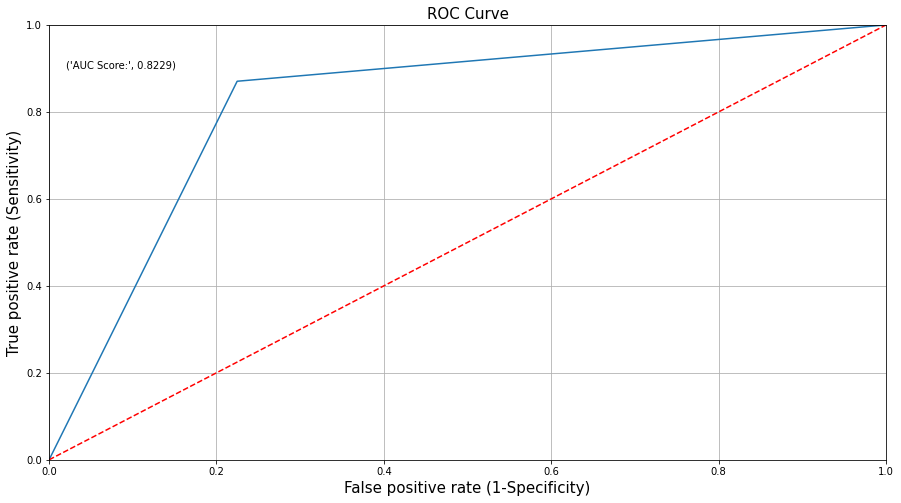

In [137]:
plot_roc(logreg_with_SGD)

In [138]:
update_score_card(model_name = 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920
4,SVM with kernel(ploynomial) with degree 2,0.827837,0.806604,0.886010,0.830189,0.658404,0.844444
5,SVM with grid search CV,0.834080,0.790393,0.937824,0.838275,0.673454,0.857820
6,Decision Tree,0.764787,0.770408,0.782383,0.765499,0.529922,0.776350
7,Decision Tree Pruned,0.806427,0.761702,0.927461,0.811321,0.618526,0.836449
8,Decision Tree using grid search,0.811827,0.765957,0.932642,0.816712,0.629425,0.841121
9,Random Forest,0.806646,0.763948,0.922280,0.811321,0.618694,0.835681


# Model 12(K Nearest Neighbours) 

In [139]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
KNN=classifier.fit(X_train,y_train)

In [140]:
y_pred=classifier.predict(X_test)

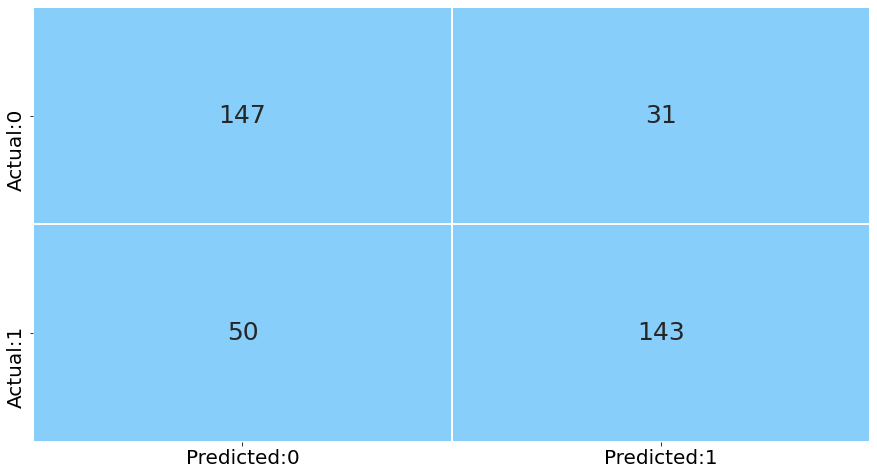

In [141]:
plot_confusion_matrix(KNN)

In [142]:
kappa_score(KNN)

0.5644340730219007

In [143]:
test_report=get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.75      0.83      0.78       178
           1       0.82      0.74      0.78       193

    accuracy                           0.78       371
   macro avg       0.78      0.78      0.78       371
weighted avg       0.79      0.78      0.78       371



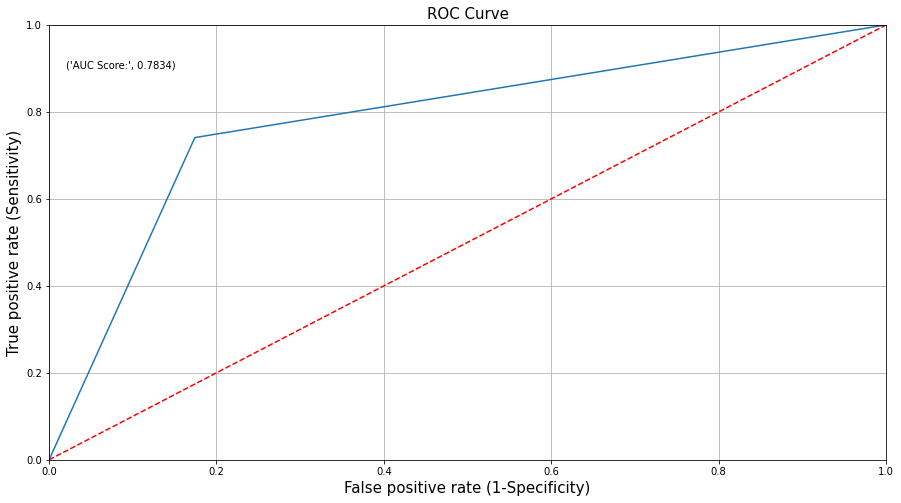

In [144]:
plot_roc(decision_tree)

In [145]:
update_score_card(model_name='K Nearest Neighbours')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM,0.837952,0.777778,0.979275,0.843666,0.683363,0.866972
1,SVM with rbf,0.828244,0.781116,0.943005,0.832884,0.662272,0.854460
2,SVM using sigmoid,0.785076,0.774038,0.834197,0.787062,0.572025,0.802993
3,SVM with kernel(polynomial),0.798466,0.784689,0.849741,0.800539,0.599024,0.815920
4,SVM with kernel(ploynomial) with degree 2,0.827837,0.806604,0.886010,0.830189,0.658404,0.844444
5,SVM with grid search CV,0.834080,0.790393,0.937824,0.838275,0.673454,0.857820
6,Decision Tree,0.764787,0.770408,0.782383,0.765499,0.529922,0.776350
7,Decision Tree Pruned,0.806427,0.761702,0.927461,0.811321,0.618526,0.836449
8,Decision Tree using grid search,0.811827,0.765957,0.932642,0.816712,0.629425,0.841121
9,Random Forest,0.806646,0.763948,0.922280,0.811321,0.618694,0.835681


# Conclusion:


Total 12 models have been built to predict whether an employee needs medical treatment or not.The best out of all these models are support vector machine which is the first model.We can see that the F1 score which is the harmonic mean between precision and recall is the highest in this model and the value is 0.886486.The accuracy of this model also stands above all other models with the value of 0.863636.

We also consider the AUC score(area under the curve) to see which model is performing best among other models and for SVM model it is 0.852381 which is the highest among all the models.

If we further see the kappa score which tells us about the agreement between the predicted and observed value, we can see that it is 0.719320 which shows that there is high agreement between predicted and observed values.

If we see the confusion matrix then the type 1 error is less i.e.4 in other models type 1 error is more than 10.In this data set as we are predicting about the treatment of an employee,so type 1 error is important. As any employee having mental health issue and if we predict that employee as not having mental illness, can be fatal. So we see that the SVM model is the best model to predict which employee needs treatment. 

Hence,we will use the test data set on this model to predict whether an employee requires medical treatment or not.